# Classifying IMDB Movie Reviews

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Background-to-the-Project" data-toc-modified-id="Background-to-the-Project-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Background to the Project</a></span></li><li><span><a href="#Loading-the-Data" data-toc-modified-id="Loading-the-Data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Loading the Data</a></span></li><li><span><a href="#Exploratory-Data-Analysis-(EDA)" data-toc-modified-id="Exploratory-Data-Analysis-(EDA)-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Exploratory Data Analysis (EDA)</a></span><ul class="toc-item"><li><span><a href="#Investigating-the-Train-and-Test-Sets" data-toc-modified-id="Investigating-the-Train-and-Test-Sets-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Investigating the Train and Test Sets</a></span></li></ul></li><li><span><a href="#Evaluation-Procedure" data-toc-modified-id="Evaluation-Procedure-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Evaluation Procedure</a></span></li><li><span><a href="#Normalization" data-toc-modified-id="Normalization-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Normalization</a></span></li><li><span><a href="#Train-/-Test-Split" data-toc-modified-id="Train-/-Test-Split-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Train / Test Split</a></span></li><li><span><a href="#Training-Models" data-toc-modified-id="Training-Models-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Training Models</a></span><ul class="toc-item"><li><span><a href="#Model-0---Constant-(Dummy-Classifier)" data-toc-modified-id="Model-0---Constant-(Dummy-Classifier)-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Model 0 - Constant (Dummy Classifier)</a></span></li><li><span><a href="#Model-1---Linear-Regression-with-NLTK-and-TF-IDF" data-toc-modified-id="Model-1---Linear-Regression-with-NLTK-and-TF-IDF-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Model 1 - Linear Regression with NLTK and TF-IDF</a></span></li><li><span><a href="#Model-2---Linear-Regression-with-spaCy-and-TF-IDF" data-toc-modified-id="Model-2---Linear-Regression-with-spaCy-and-TF-IDF-7.3"><span class="toc-item-num">7.3&nbsp;&nbsp;</span>Model 2 - Linear Regression with spaCy and TF-IDF</a></span></li><li><span><a href="#Model-3---LGBMClassifier-with-SpaCy-and-TF-IDF" data-toc-modified-id="Model-3---LGBMClassifier-with-SpaCy-and-TF-IDF-7.4"><span class="toc-item-num">7.4&nbsp;&nbsp;</span>Model 3 - LGBMClassifier with SpaCy and TF-IDF</a></span></li><li><span><a href="#Model-4---Logistic-Regression-with-BERT-(Bidirectional-Encoder-Representations-from-Transformers)" data-toc-modified-id="Model-4---Logistic-Regression-with-BERT-(Bidirectional-Encoder-Representations-from-Transformers)-7.5"><span class="toc-item-num">7.5&nbsp;&nbsp;</span>Model 4 - Logistic Regression with BERT (Bidirectional Encoder Representations from Transformers)</a></span></li></ul></li><li><span><a href="#My-Reviews" data-toc-modified-id="My-Reviews-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>My Reviews</a></span><ul class="toc-item"><li><span><a href="#Model-1---Linear-Regression-with-NLTK-and-TF-IDF" data-toc-modified-id="Model-1---Linear-Regression-with-NLTK-and-TF-IDF-8.1"><span class="toc-item-num">8.1&nbsp;&nbsp;</span>Model 1 - Linear Regression with NLTK and TF-IDF</a></span></li><li><span><a href="#Model-2---Linear-Regression-with-spaCy-and-TF-IDF" data-toc-modified-id="Model-2---Linear-Regression-with-spaCy-and-TF-IDF-8.2"><span class="toc-item-num">8.2&nbsp;&nbsp;</span>Model 2 - Linear Regression with spaCy and TF-IDF</a></span></li><li><span><a href="#Model-3---LGBMClassifier-with-SpaCy-and-TF-IDF" data-toc-modified-id="Model-3---LGBMClassifier-with-SpaCy-and-TF-IDF-8.3"><span class="toc-item-num">8.3&nbsp;&nbsp;</span>Model 3 - LGBMClassifier with SpaCy and TF-IDF</a></span></li><li><span><a href="#Model-4---Logistic-Regression-with-BERT" data-toc-modified-id="Model-4---Logistic-Regression-with-BERT-8.4"><span class="toc-item-num">8.4&nbsp;&nbsp;</span>Model 4 - Logistic Regression with BERT</a></span></li></ul></li><li><span><a href="#Conclusions" data-toc-modified-id="Conclusions-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Conclusions</a></span></li></ul></div>

## Background to the Project

The Film Junky Union, a new community for classic movie enthusiasts, was developing a system for filtering and categorizing movie reviews. 

The goal was to train a model to classify positive and negative reviews using a dataset of IMBD movie reviews with polarity labelling.  

The model needed to have an F1 score of at least 0.85.

In [1]:
import math

import numpy as np
import pandas as pd
import re

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

from tqdm.auto import tqdm

import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'png'
# the next line provides graphs of better quality on HiDPI screens
%config InlineBackend.figure_format = 'retina'

plt.style.use('seaborn')

In [3]:
# this is to use progress_apply
tqdm.pandas()

## Loading the Data

We first load and explore the data:

In [4]:
try:
    df_reviews = pd.read_csv('/datasets/imdb_reviews.tsv', sep='\t', dtype={'votes': 'Int64'})
except:
    df_reviews = pd.read_csv('/Users/Steve Lewis/practicum_datasets/imdb_reviews.tsv', sep='\t', dtype={'votes': 'Int64'})

In [5]:
df_reviews.head()

,tconst,title_type,primary_title,original_title,start_year,end_year,runtime_minutes,is_adult,genres,average_rating,votes,review,rating,sp,pos,ds_part,idx
0,tt0068152,movie,$,$,1971,\N,121,0,"Comedy,Crime,Drama",6.3,2218,The pakage implies that Warren Beatty and Gold...,1,neg,0,train,8335
1,tt0068152,movie,$,$,1971,\N,121,0,"Comedy,Crime,Drama",6.3,2218,How the hell did they get this made?! Presenti...,1,neg,0,train,8336
2,tt0313150,short,'15','15',2002,\N,25,0,"Comedy,Drama,Short",6.3,184,There is no real story the film seems more lik...,3,neg,0,test,2489
3,tt0313150,short,'15','15',2002,\N,25,0,"Comedy,Drama,Short",6.3,184,Um .... a serious film about troubled teens in...,7,pos,1,test,9280
4,tt0313150,short,'15','15',2002,\N,25,0,"Comedy,Drama,Short",6.3,184,I'm totally agree with GarryJohal from Singapo...,9,pos,1,test,9281


In [6]:
df_reviews.head().T

,0,1,2,3,4
tconst,tt0068152,tt0068152,tt0313150,tt0313150,tt0313150
title_type,movie,movie,short,short,short
primary_title,$,$,'15','15','15'
original_title,$,$,'15','15','15'
start_year,1971,1971,2002,2002,2002
end_year,\N,\N,\N,\N,\N
runtime_minutes,121,121,25,25,25
is_adult,0,0,0,0,0
genres,"Comedy,Crime,Drama","Comedy,Crime,Drama","Comedy,Drama,Short","Comedy,Drama,Short","Comedy,Drama,Short"
average_rating,6.3,6.3,6.3,6.3,6.3


In [7]:
df_reviews.shape

(47331, 17)

In [8]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47331 entries, 0 to 47330
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           47331 non-null  object 
 1   title_type       47331 non-null  object 
 2   primary_title    47331 non-null  object 
 3   original_title   47331 non-null  object 
 4   start_year       47331 non-null  int64  
 5   end_year         47331 non-null  object 
 6   runtime_minutes  47331 non-null  object 
 7   is_adult         47331 non-null  int64  
 8   genres           47331 non-null  object 
 9   average_rating   47329 non-null  float64
 10  votes            47329 non-null  Int64  
 11  review           47331 non-null  object 
 12  rating           47331 non-null  int64  
 13  sp               47331 non-null  object 
 14  pos              47331 non-null  int64  
 15  ds_part          47331 non-null  object 
 16  idx              47331 non-null  int64  
dtypes: Int64(1),

The data has loaded correctly and we do not see anything alarming.

## Exploratory Data Analysis (EDA)

We will examine the data in order to understand it better.  

We will investigate how the average number of reviews per movies varies by genre.

First we calculate the number of movies by genre in the dataset:

In [9]:
movies_by_genre = df_reviews[['tconst', 'genres']].drop_duplicates()['genres'].value_counts().to_frame(name='movies')
movies_by_genre

,movies
Drama,567
Comedy,357
"Drama,Romance",255
Horror,203
"Comedy,Drama",186
...,...
"Animation,Sci-Fi",1
"Animation,Documentary,Short",1
"Action,Comedy,Musical",1
"Action,Romance,Thriller",1


Now we calculate the number of reviews by genre in the dataset:

In [10]:
reviews_by_genre = df_reviews.groupby('genres')['review'].count().sort_values(ascending = False).to_frame(name='reviews')
reviews_by_genre

,reviews
genres,
Drama,3392
Comedy,2160
"Drama,Romance",1808
Horror,1725
"Comedy,Romance",1304
...,...
"Animation,Comedy,Romance",1
"Drama,Fantasy,Musical",1
"Comedy,Game-Show,Sport",1


We calculate and plot the 'Average Number of Reviews per Movie, by Genre' for the top genres:

Text(0.5, 1.0, 'Average Number of Reviews per Movie, by Genre')

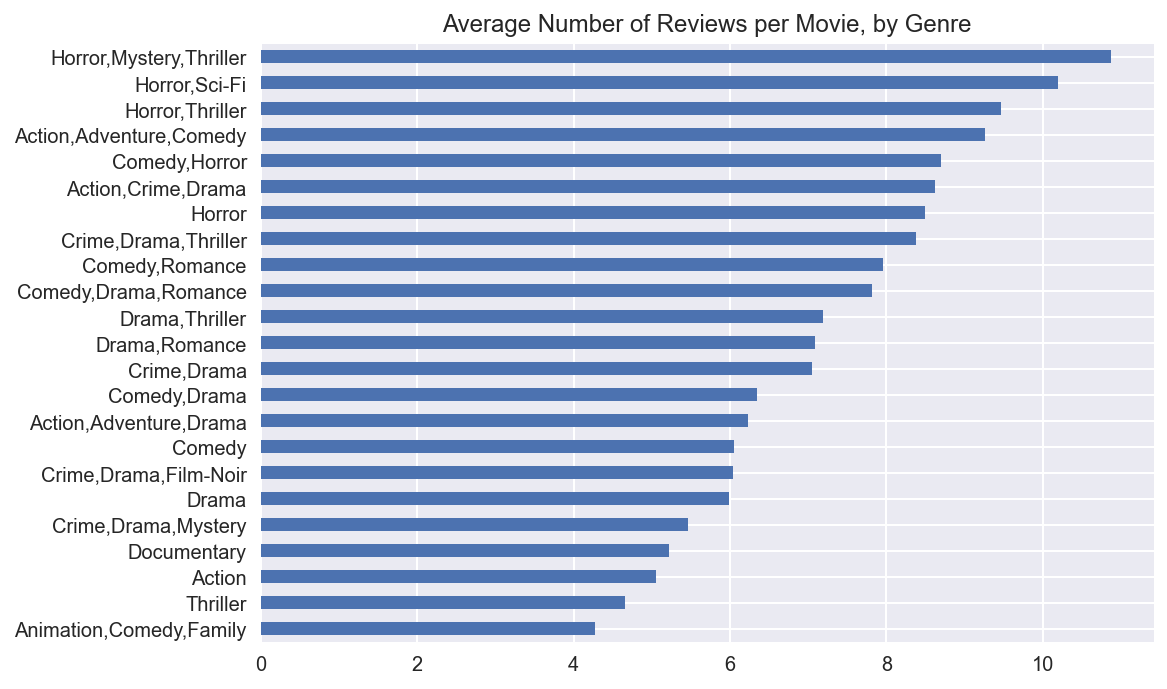

In [11]:
dfg = pd.merge(movies_by_genre, reviews_by_genre, left_index=True, right_index=True)
dfg['avg_reviews_per_movie'] =  dfg['reviews'] / dfg['movies']
dfg_sub = dfg.query('movies > 50').sort_values('avg_reviews_per_movie')
dfg_sub['avg_reviews_per_movie'].plot(kind = 'barh')
plt.title('Average Number of Reviews per Movie, by Genre')

It appears that viewers of horror movies are most inclined to write reviews on IMDB.

We will now investigate the proportion of positive and negative reviews by genre:

In [12]:
dfz = df_reviews.groupby(['genres', 'pos'])['pos'].count().unstack().fillna(0)
dfz['total'] = (dfz[0] + dfz[1])
dfz.columns = ['negative', 'positive', 'total']
dfz = dfz.sort_values(by = 'total', ascending = False)
dfz = dfz.query('total > 600')
dfz

,negative,positive,total
genres,,,
Drama,1224.0,2168.0,3392.0
Comedy,1124.0,1036.0,2160.0
"Drama,Romance",823.0,985.0,1808.0
Horror,1380.0,345.0,1725.0
"Comedy,Romance",599.0,705.0,1304.0
"Comedy,Drama,Romance",522.0,690.0,1212.0
"Comedy,Drama",489.0,692.0,1181.0
"Action,Crime,Drama",511.0,403.0,914.0
"Horror,Thriller",601.0,289.0,890.0


Now we will plot this data on a **stacked bar chart** in order to better understand it:

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'Drama'),
  Text(1, 0, 'Comedy'),
  Text(2, 0, 'Drama,Romance'),
  Text(3, 0, 'Horror'),
  Text(4, 0, 'Comedy,Romance'),
  Text(5, 0, 'Comedy,Drama,Romance'),
  Text(6, 0, 'Comedy,Drama'),
  Text(7, 0, 'Action,Crime,Drama'),
  Text(8, 0, 'Horror,Thriller'),
  Text(9, 0, 'Crime,Drama'),
  Text(10, 0, 'Drama,Thriller')])

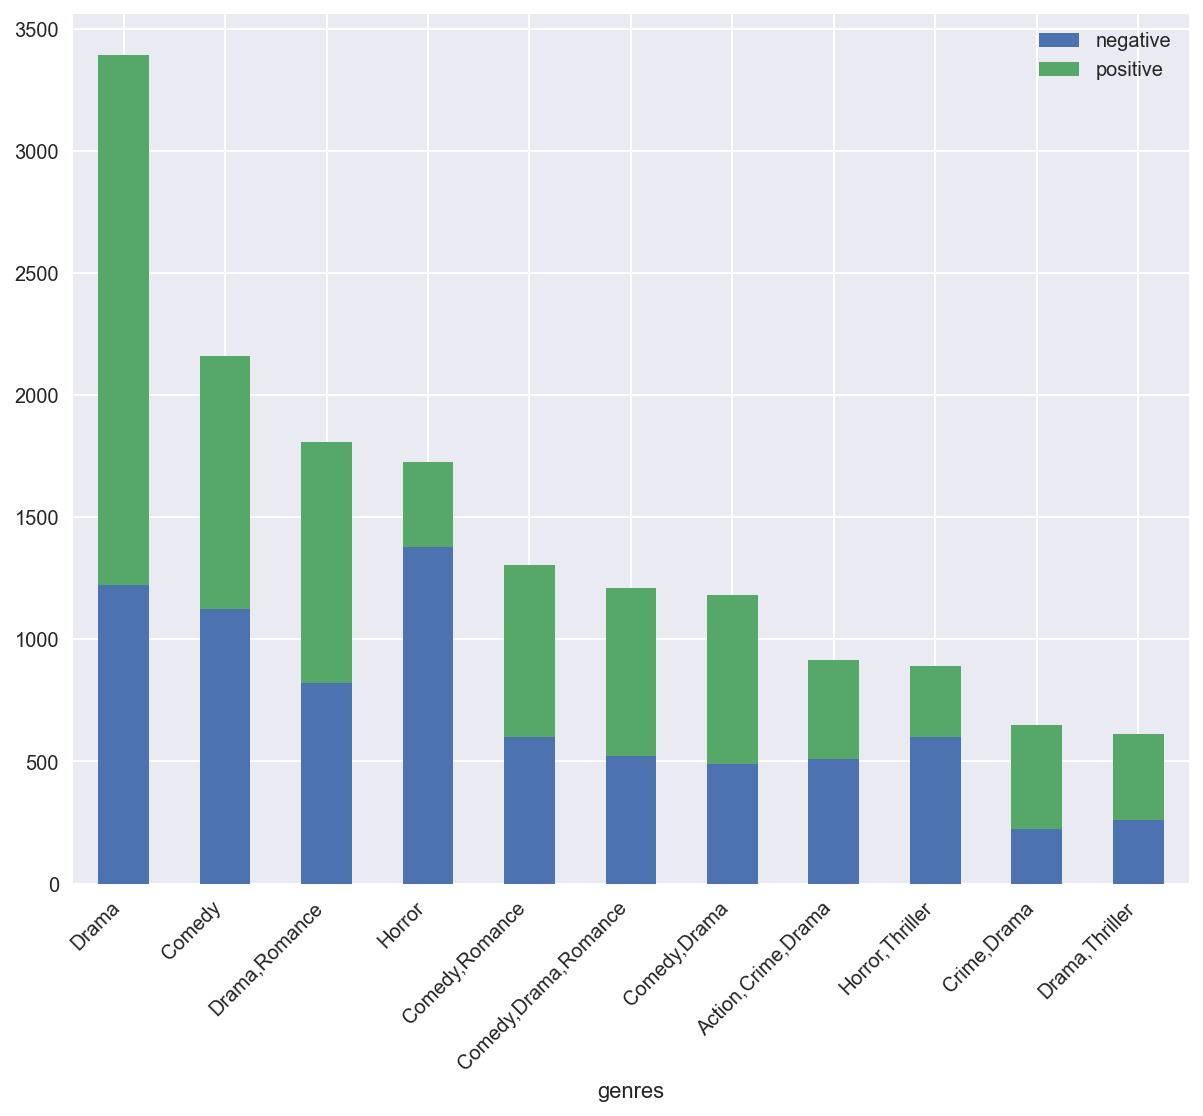

In [13]:
dfz[['negative', 'positive']].plot(kind='bar', stacked=True, label='#reviews (neg, pos)', figsize = (10,8))
plt.xticks(rotation=45,ha='right')

Now we see that most of the reviews in the Horror genre (and in the Horror,Thriller genre) were negative, whereas the majority of the reviews in other genres were positive.

Let's check the number of movies and reviews over years:

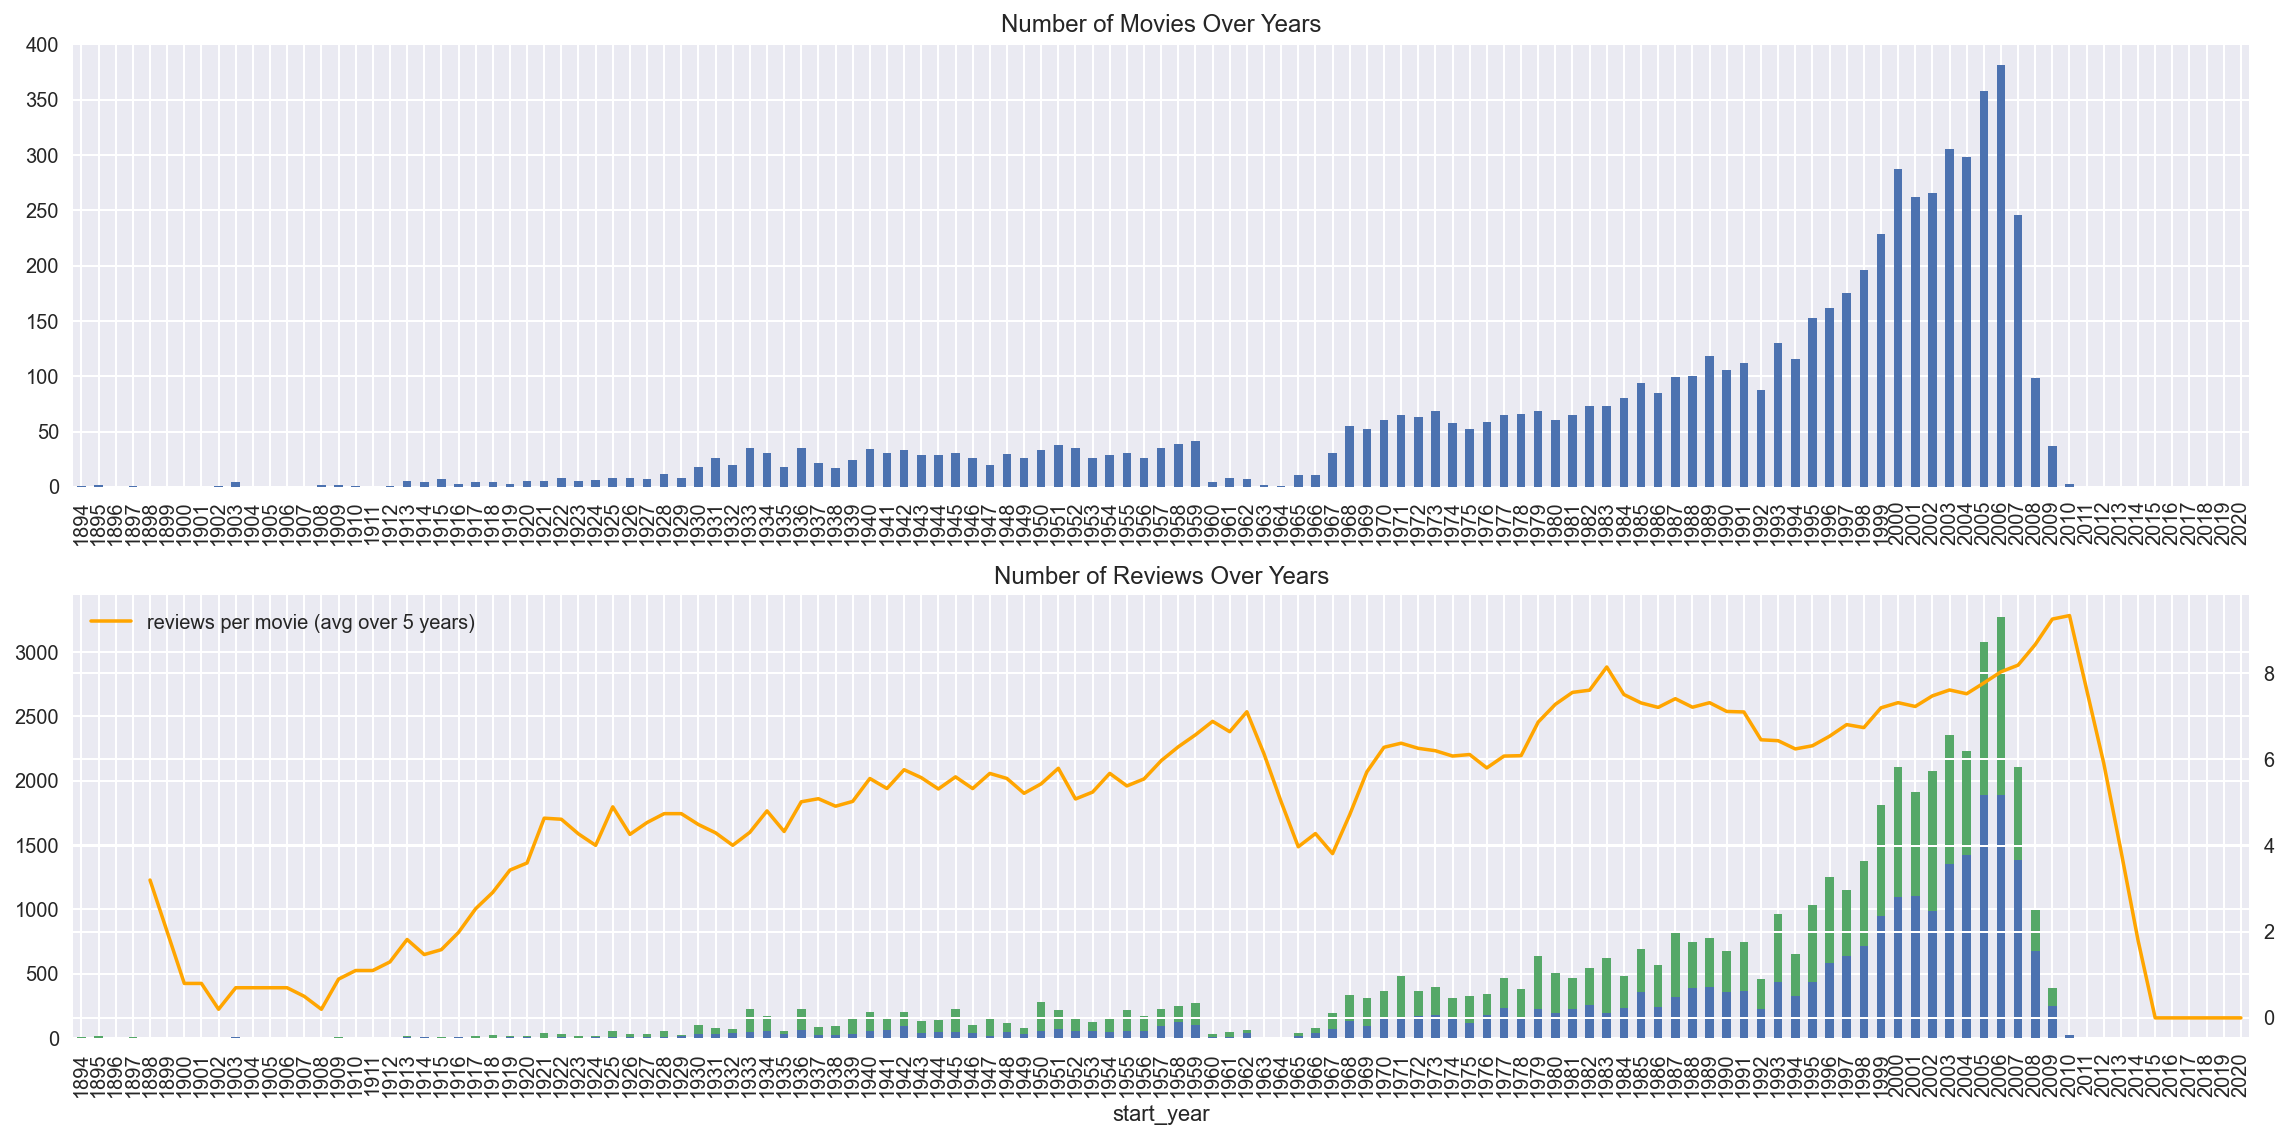

In [14]:
fig, axs = plt.subplots(2, 1, figsize=(16, 8))

ax = axs[0]

dft1 = df_reviews[['tconst', 'start_year']].drop_duplicates()['start_year'].value_counts().sort_index()
dft1 = dft1.reindex(index=np.arange(dft1.index.min(), max(dft1.index.max(), 2021))).fillna(0)
dft1.plot(kind='bar', ax=ax)
ax.set_title('Number of Movies Over Years')

ax = axs[1]

dft2 = df_reviews.groupby(['start_year', 'pos'])['pos'].count().unstack()
dft2 = dft2.reindex(index=np.arange(dft2.index.min(), max(dft2.index.max(), 2021))).fillna(0)

dft2.plot(kind='bar', stacked=True, label='#reviews (neg, pos)', ax=ax)

dft2 = df_reviews['start_year'].value_counts().sort_index()
dft2 = dft2.reindex(index=np.arange(dft2.index.min(), max(dft2.index.max(), 2021))).fillna(0)
dft3 = (dft2/dft1).fillna(0)
axt = ax.twinx()
dft3.reset_index(drop=True).rolling(5).mean().plot(color='orange', label='reviews per movie (avg over 5 years)', ax=axt)

lines, labels = axt.get_legend_handles_labels()
ax.legend(lines, labels, loc='upper left')

ax.set_title('Number of Reviews Over Years')

fig.tight_layout()

Let's plot the distribution of number of reviews per movie with the exact counting and 'Kernel Density Estimation' (which will give us a more smoothed plot)

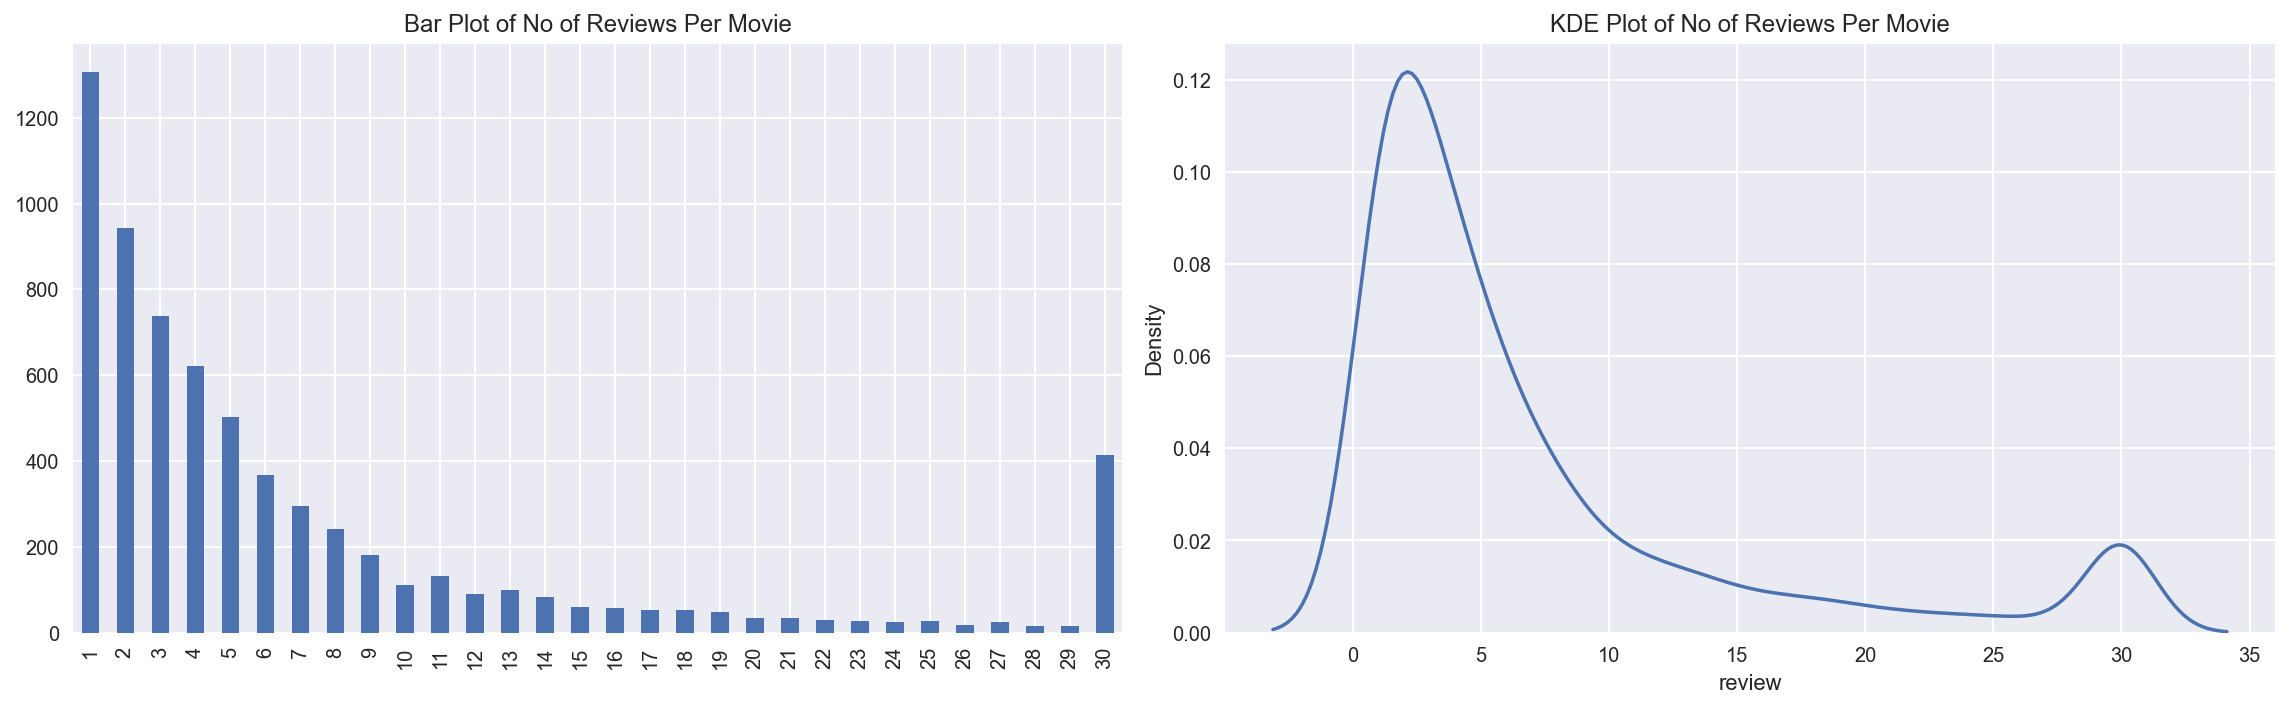

In [15]:
fig, axs = plt.subplots(1, 2, figsize=(16, 5))

ax = axs[0]
dft = df_reviews.groupby('tconst')['review'].count().value_counts().sort_index()
dft.plot.bar(ax=ax)
ax.set_title('Bar Plot of No of Reviews Per Movie')

ax = axs[1]
dft = df_reviews.groupby('tconst')['review'].count()
sns.kdeplot(dft, ax=ax)
ax.set_title('KDE Plot of No of Reviews Per Movie')

fig.tight_layout()

### Investigating the Train and Test Sets

The train and test sets have already been split, per the 'ds_part' column in the dataset.  We will investigate the size of the given split and draw conclusions on the class balance/imbalance.

In [16]:
df_reviews['ds_part'].value_counts(normalize=True)

train    0.502757
test     0.497243
Name: ds_part, dtype: float64

The data has basically been split into half to create the train and test sets.

Let's now investigate the level of class imbalance in the two sets:

In [17]:
df_reviews.query('ds_part == "train"')['pos'].value_counts()

0    11912
1    11884
Name: pos, dtype: int64

In [18]:
df_reviews.query('ds_part == "test"')['pos'].value_counts()

0    11803
1    11732
Name: pos, dtype: int64

It appears that the size of positive and negative classes are close to equal in each of the train and test sets, so we do not have to deal with class imbalance.

We now investigate and plot the distribution of ratings in the train and the test sets:

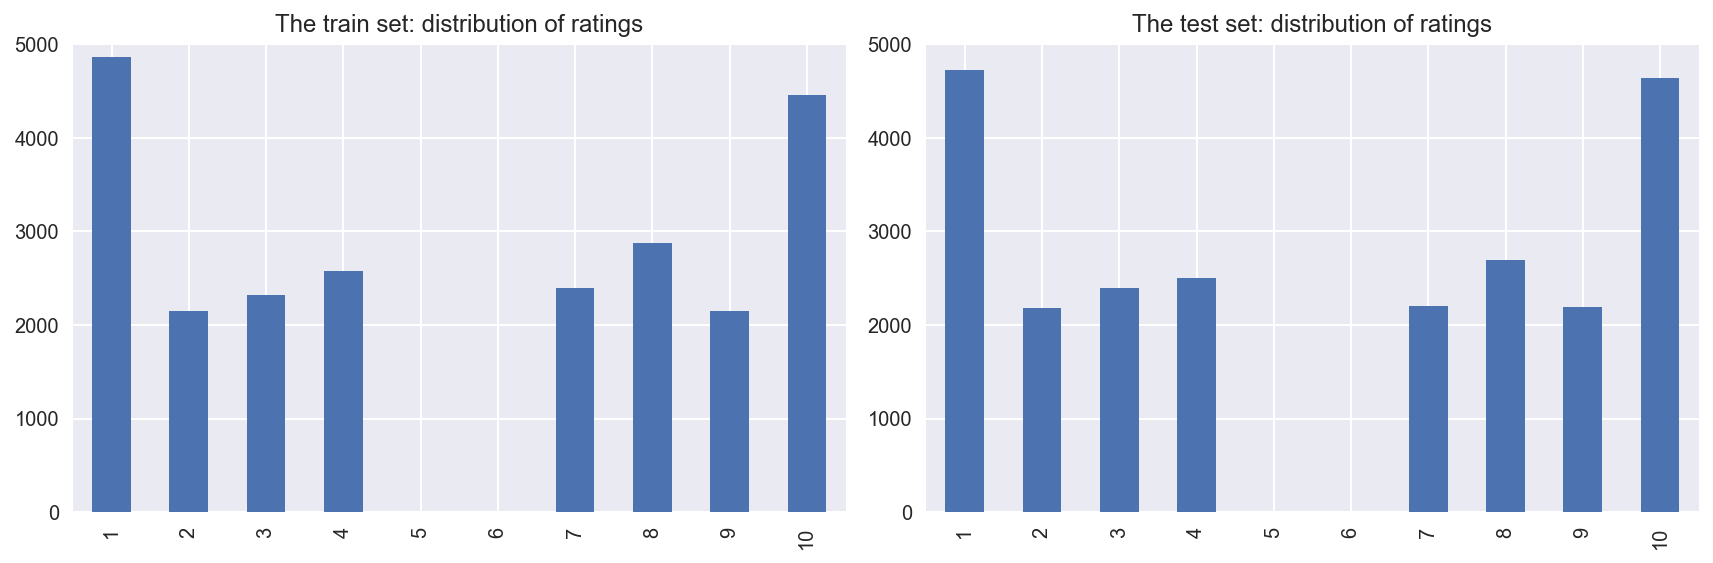

In [19]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

ax = axs[0]
dft = df_reviews.query('ds_part == "train"')['rating'].value_counts().sort_index()
dft = dft.reindex(index=np.arange(min(dft.index.min(), 1), max(dft.index.max(), 11))).fillna(0)
dft.plot.bar(ax=ax)
ax.set_ylim([0, 5000])
ax.set_title('The train set: distribution of ratings')

ax = axs[1]
dft = df_reviews.query('ds_part == "test"')['rating'].value_counts().sort_index()
dft = dft.reindex(index=np.arange(min(dft.index.min(), 1), max(dft.index.max(), 11))).fillna(0)
dft.plot.bar(ax=ax)
ax.set_ylim([0, 5000])
ax.set_title('The test set: distribution of ratings')

fig.tight_layout()

It appears that the distribution of ratings are very similar in the train and test sets.  The lack of '5' and '6' ratings indicates that people write reviews when they either like a movie (scores 7 to 10) or dislike a movie (scores 1 to 4), not when they only think it's 'ok'.

Lets now look at the distribution of negative and positive reviews over the years for the train and test parts of the dataset

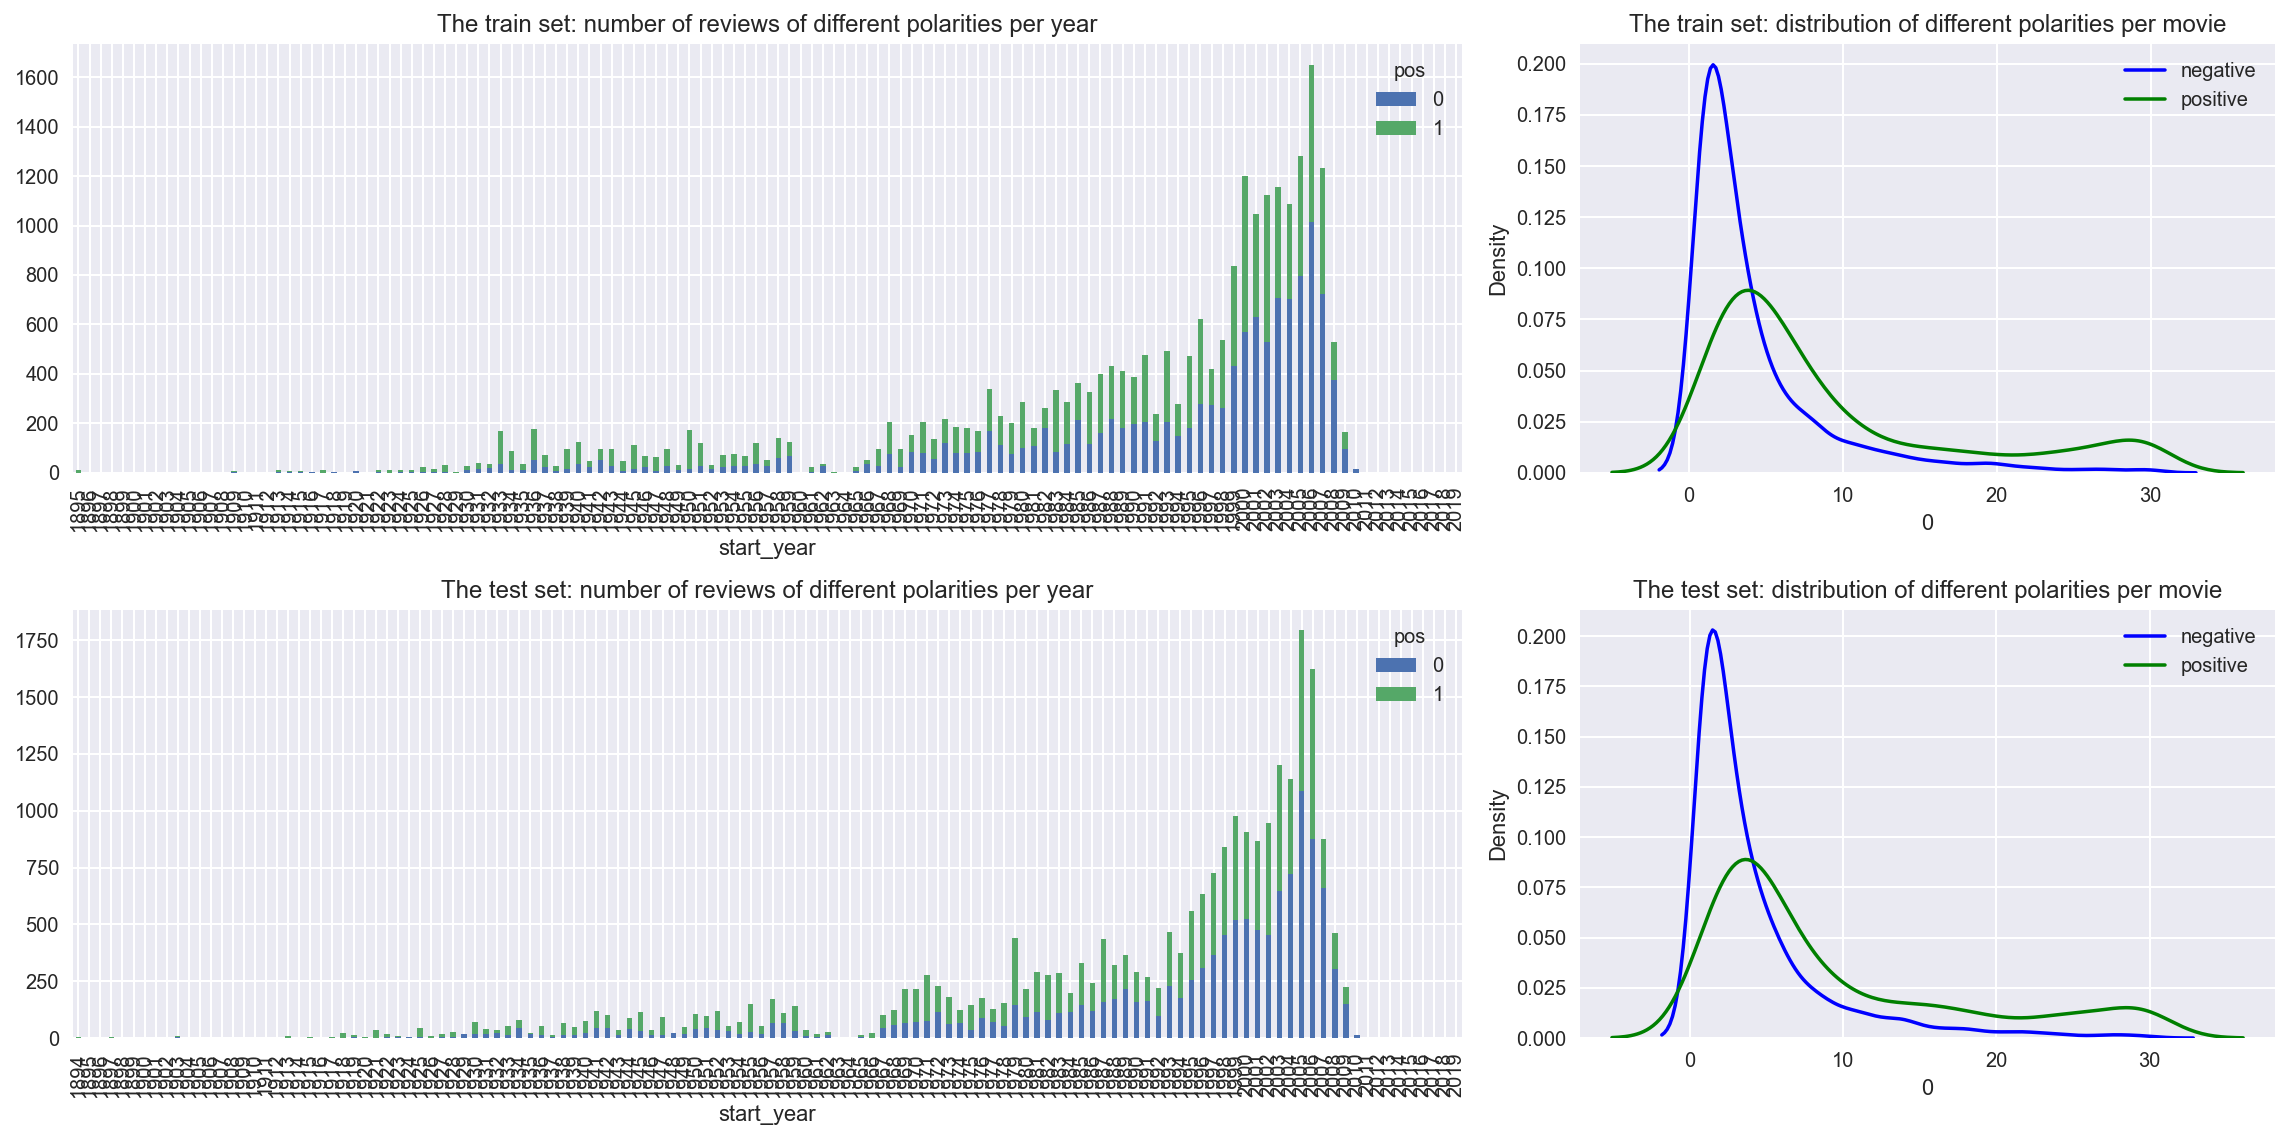

In [20]:
fig, axs = plt.subplots(2, 2, figsize=(16, 8), gridspec_kw=dict(width_ratios=(2, 1), height_ratios=(1, 1)))

ax = axs[0][0]

dft = df_reviews.query('ds_part == "train"').groupby(['start_year', 'pos'])['pos'].count().unstack()
dft.index = dft.index.astype('int')
dft = dft.reindex(index=np.arange(dft.index.min(), max(dft.index.max(), 2020))).fillna(0)
dft.plot(kind='bar', stacked=True, ax=ax)
ax.set_title('The train set: number of reviews of different polarities per year')

ax = axs[0][1]

dft = df_reviews.query('ds_part == "train"').groupby(['tconst', 'pos'])['pos'].count().unstack()
sns.kdeplot(dft[0], color='blue', label='negative', ax=ax)
sns.kdeplot(dft[1], color='green', label='positive', ax=ax)
ax.legend()
ax.set_title('The train set: distribution of different polarities per movie')

ax = axs[1][0]

dft = df_reviews.query('ds_part == "test"').groupby(['start_year', 'pos'])['pos'].count().unstack()
dft.index = dft.index.astype('int')
dft = dft.reindex(index=np.arange(dft.index.min(), max(dft.index.max(), 2020))).fillna(0)
dft.plot(kind='bar', stacked=True, ax=ax)
ax.set_title('The test set: number of reviews of different polarities per year')

ax = axs[1][1]

dft = df_reviews.query('ds_part == "test"').groupby(['tconst', 'pos'])['pos'].count().unstack()
sns.kdeplot(dft[0], color='blue', label='negative', ax=ax)
sns.kdeplot(dft[1], color='green', label='positive', ax=ax)
ax.legend()
ax.set_title('The test set: distribution of different polarities per movie')

fig.tight_layout()

We see from the plots on the right that a great many movies in both the train and the test set had a small number of negative reviews - and hardly any movie has no negative reviews. The peak of positive reviews occurs at around 4 reviews. 

## Evaluation Procedure

This evaluation routine was given for this project and will be used for all models in this project. 

It calculates the Accuracy, F1 Score, ROC AUC Score and Average Precision Score for both the train and the test set.

It also plots the following 3 graphs: F1 Score vs Thresholds, FPR (False Positve Rate) vs TPR (True Positive Rate) and the ROC Curve (Recall vs Precision).

In [21]:
import sklearn.metrics as metrics

def evaluate_model(model, train_features, train_target, test_features, test_target):
    
    eval_stats = {}
    
    fig, axs = plt.subplots(1, 3, figsize=(20, 6)) 
    
    for type, features, target in (('train', train_features, train_target), ('test', test_features, test_target)):
        
        eval_stats[type] = {}
    
        pred_target = model.predict(features)
        pred_proba = model.predict_proba(features)[:, 1]
        
        # F1
        f1_thresholds = np.arange(0, 1.01, 0.05)
        f1_scores = [metrics.f1_score(target, pred_proba>=threshold) for threshold in f1_thresholds]
        
        # ROC
        fpr, tpr, roc_thresholds = metrics.roc_curve(target, pred_proba)
        roc_auc = metrics.roc_auc_score(target, pred_proba)    
        eval_stats[type]['ROC AUC'] = roc_auc

        # PRC
        precision, recall, pr_thresholds = metrics.precision_recall_curve(target, pred_proba)
        aps = metrics.average_precision_score(target, pred_proba)
        eval_stats[type]['APS'] = aps
        
        if type == 'train':
            color = 'blue'
        else:
            color = 'green'

        # F1 Score
        ax = axs[0]
        max_f1_score_idx = np.argmax(f1_scores)
        ax.plot(f1_thresholds, f1_scores, color=color, label=f'{type}, max={f1_scores[max_f1_score_idx]:.2f} @ {f1_thresholds[max_f1_score_idx]:.2f}')
        # setting crosses for some thresholds
        for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
            closest_value_idx = np.argmin(np.abs(f1_thresholds-threshold))
            marker_color = 'orange' if threshold != 0.5 else 'red'
            ax.plot(f1_thresholds[closest_value_idx], f1_scores[closest_value_idx], color=marker_color, marker='X', markersize=7)
        ax.set_xlim([-0.02, 1.02])    
        ax.set_ylim([-0.02, 1.02])
        ax.set_xlabel('threshold')
        ax.set_ylabel('F1')
        ax.legend(loc='lower center')
        ax.set_title(f'F1 Score') 

        # ROC
        ax = axs[1]    
        ax.plot(fpr, tpr, color=color, label=f'{type}, ROC AUC={roc_auc:.2f}')
        # setting crosses for some thresholds
        for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
            closest_value_idx = np.argmin(np.abs(roc_thresholds-threshold))
            marker_color = 'orange' if threshold != 0.5 else 'red'            
            ax.plot(fpr[closest_value_idx], tpr[closest_value_idx], color=marker_color, marker='X', markersize=7)
        ax.plot([0, 1], [0, 1], color='grey', linestyle='--')
        ax.set_xlim([-0.02, 1.02])    
        ax.set_ylim([-0.02, 1.02])
        ax.set_xlabel('FPR')
        ax.set_ylabel('TPR')
        ax.legend(loc='lower center')        
        ax.set_title(f'ROC Curve')
        
        # PRC
        ax = axs[2]
        ax.plot(recall, precision, color=color, label=f'{type}, AP={aps:.2f}')
        # setting crosses for some thresholds
        for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
            closest_value_idx = np.argmin(np.abs(pr_thresholds-threshold))
            marker_color = 'orange' if threshold != 0.5 else 'red'
            ax.plot(recall[closest_value_idx], precision[closest_value_idx], color=marker_color, marker='X', markersize=7)
        ax.set_xlim([-0.02, 1.02])    
        ax.set_ylim([-0.02, 1.02])
        ax.set_xlabel('recall')
        ax.set_ylabel('precision')
        ax.legend(loc='lower center')
        ax.set_title(f'PRC')        

        eval_stats[type]['Accuracy'] = metrics.accuracy_score(target, pred_target)
        eval_stats[type]['F1'] = metrics.f1_score(target, pred_target)
    
    df_eval_stats = pd.DataFrame(eval_stats)
    df_eval_stats = df_eval_stats.round(2)
    df_eval_stats = df_eval_stats.reindex(index=('Accuracy', 'F1', 'APS', 'ROC AUC'))
    
    print(df_eval_stats)
    
    return

## Normalization

We will train all models with texts in lowercase and without any digits, punctuations marks etc. We therefore now create a function to remove all characters except letters, apostrophes and spaces and change all letters to lowercase. The regular expression **^a-zA-Z'** finds all characters that are NOT lower case letters, uppercase letter or apostophes. The 'split' and 'join' methods remove any unwanted extra spaces.

In [22]:
def clear_text(text):
    pattern = r"[^a-zA-Z']"
    text = re.sub(pattern, " ", text)
    text = text.split()
    text = " ".join(text)
    return text.lower()

We now apply this function to all the reviews in the dataset.

In [23]:
df_reviews['review_norm'] = df_reviews['review'].apply(clear_text)

We compare one of the reviews before and after to check that the operation was succesful:

In [24]:
df_reviews['review'][1]

'How the hell did they get this made?! Presenting itself as a caper comedy, the misbegotten "$" is essentially two hours of people mumbling sentence fragments. The usually dependable Warren Beatty looks drunk, and the usually hilarious Goldie Hawn acts like she\'s on depressants. As for Gert Frobe, his most famous role - Goldfinger - was infinitely more admirable than his character here. Not even the guy with the champagne bottle of LSD can save this litany of worthlessness. Am I comparing this movie to "Plan 9 from Outer Space"? I wouldn\'t do such a thing even if someone paid me. "P9FOS" was idiotically made but ended up hilarious; this was idiotically made and causes you to feel like your brain just melted out of your ears. Warren Beatty and Goldie Hawn made up for this when they co-starred in "Shampoo", but then they co-starred in the dreadful "Town & Country". Maybe they just shouldn\'t co-star in movies. All in all, I would rather have my skin torn off than have to watch this aga

In [25]:
df_reviews['review_norm'][1]

"how the hell did they get this made presenting itself as a caper comedy the misbegotten is essentially two hours of people mumbling sentence fragments the usually dependable warren beatty looks drunk and the usually hilarious goldie hawn acts like she's on depressants as for gert frobe his most famous role goldfinger was infinitely more admirable than his character here not even the guy with the champagne bottle of lsd can save this litany of worthlessness am i comparing this movie to plan from outer space i wouldn't do such a thing even if someone paid me p fos was idiotically made but ended up hilarious this was idiotically made and causes you to feel like your brain just melted out of your ears warren beatty and goldie hawn made up for this when they co starred in shampoo but then they co starred in the dreadful town country maybe they just shouldn't co star in movies all in all i would rather have my skin torn off than have to watch this again awful maybe they should remake it wit

We can see that all the unwanted characters in this review have been successfully removed and all remaining characters changed to lowercase. We confirm that our function *clear_text()* has worked correctly.

## Train / Test Split

The dataset has already divided into train/test parts. The flag that corresponds to this is 'ds_part'. We need to use this to create the 'targets' for our train and test datasets:

In [26]:
df_reviews_train = df_reviews.query('ds_part == "train"').copy()
df_reviews_test = df_reviews.query('ds_part == "test"').copy()

train_target = df_reviews_train['pos']
test_target = df_reviews_test['pos']

print(df_reviews_train.shape)
print(df_reviews_test.shape)

(23796, 18)
(23535, 18)


## Training Models

We will train 5 models:
1. A dummy classifier which will serve as our baseline model
2. A Logistic Regression model with TF-IDF vectors from text lemmatised with the NLTK library
3. A Logistic Regression model with TF-IDF vectors from text lemmatised with the SpaCy library
4. A LGBMClassifier model with TF-IDF vectors from text lemmatised with the SpaCy library
5. A Logistic Regression model with BERT (Bidirectional Encoder Representations from Transformers) embeddings. Note that we will use only 200 reviews from both the train and test datasets to avoid waiting too long to get the embeddings.

### Model 0 - Constant (Dummy Classifier)

If we had a model that assigned "0" or "1" randomly (i.e. it would "guess" the answers instead of trying to infer them from the features, there would be a 50% chance of either a 0 or a 1. The accuracy of that model would = 0.5.  

We run a Dummy Classifier as a simple baseline and compare with our other models. DummyClassifier is a classifier that makes predictions using simple rules and we will set it to *constant* whereby it will always predict "1".

We will use one feature only to train the models - the normalised review text:

In [27]:
train_features = df_reviews_train['review_norm']
test_features = df_reviews_test['review_norm']
print(train_features.shape)
print(test_features.shape)

(23796,)
(23535,)


In [28]:
from sklearn.dummy import DummyClassifier

In [29]:
dummy_clf = DummyClassifier(random_state = 12345, strategy = "constant", constant = 1)
dummy_clf.fit(train_features, train_target)

DummyClassifier(constant=1, random_state=12345, strategy='constant')

We run the evaluation routine for the constant model:

          train  test
Accuracy   0.50  0.50
F1         0.67  0.67
APS        0.50  0.50
ROC AUC    0.50  0.50


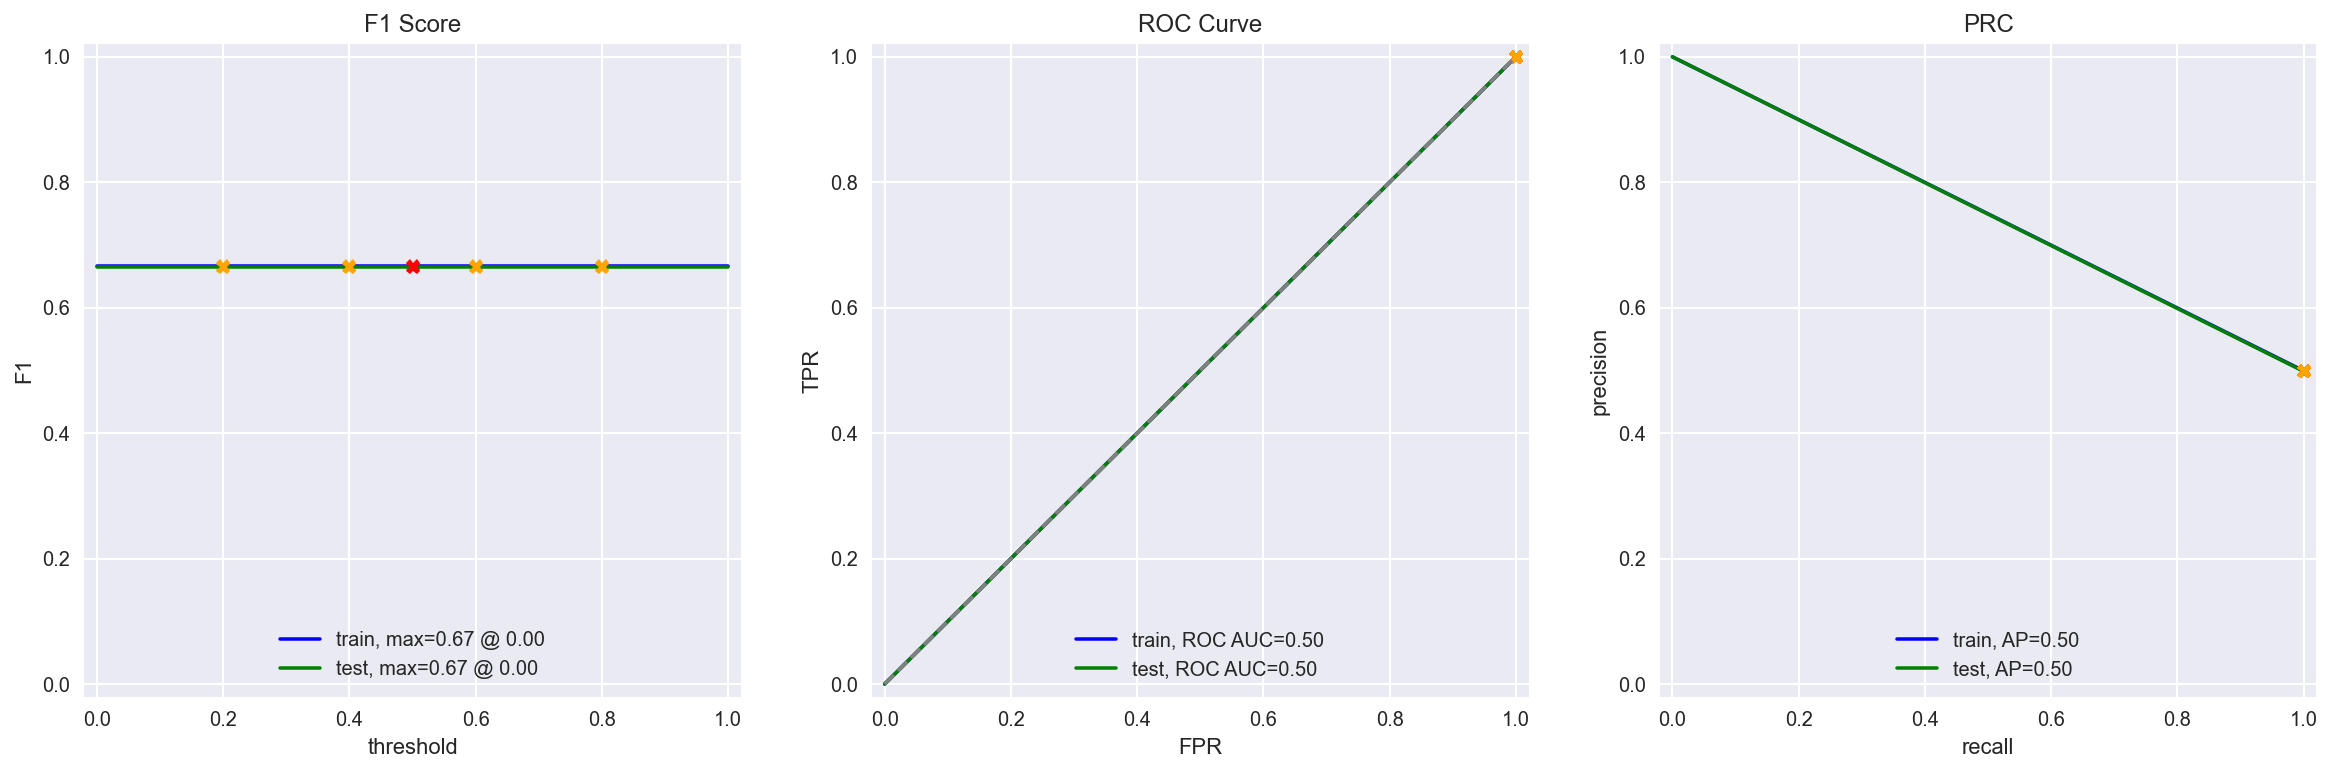

In [30]:
evaluate_model(dummy_clf, train_features, train_target, test_features, test_target)

This is our baseline model.  The ROC is 0.5 which indicates this model is just 'random chance'.

### Model 1 - Linear Regression with NLTK and TF-IDF

We will now proceed to train two logistic regression models.  

For Model 1 we will use the NTLK (Natural Language Toolkit) library and for Model 2 we will use the SpaCy library.

We first tokenise and lemmatize the text:

In [31]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

from nltk.corpus import stopwords

We create a function to lemmatize the text:

In [32]:
lemmatizer  = WordNetLemmatizer()

def lemmatize_ntlk(review):
    tokens = word_tokenize(review)
    lemmas = [lemmatizer.lemmatize(token) for token in tokens]
    lemmatized = " ".join(lemmas)
    return lemmatized

Now we use progress_apply to lemmatize the text in both the training set and the test set(progress apply shows how the apply function is progressing while running):

In [33]:
%%time
df_reviews_train["lemmatized_reviews_ntlk"]= df_reviews_train["review_norm"].progress_apply(lemmatize_ntlk)

  0%|          | 0/23796 [00:00<?, ?it/s]

Wall time: 3min 27s


In [34]:
%%time
df_reviews_test["lemmatized_reviews_ntlk"]= df_reviews_test["review_norm"].progress_apply(lemmatize_ntlk)

  0%|          | 0/23535 [00:00<?, ?it/s]

Wall time: 2min 35s


In [35]:
df_reviews_train['review_norm'][1]

"how the hell did they get this made presenting itself as a caper comedy the misbegotten is essentially two hours of people mumbling sentence fragments the usually dependable warren beatty looks drunk and the usually hilarious goldie hawn acts like she's on depressants as for gert frobe his most famous role goldfinger was infinitely more admirable than his character here not even the guy with the champagne bottle of lsd can save this litany of worthlessness am i comparing this movie to plan from outer space i wouldn't do such a thing even if someone paid me p fos was idiotically made but ended up hilarious this was idiotically made and causes you to feel like your brain just melted out of your ears warren beatty and goldie hawn made up for this when they co starred in shampoo but then they co starred in the dreadful town country maybe they just shouldn't co star in movies all in all i would rather have my skin torn off than have to watch this again awful maybe they should remake it wit

In [36]:
df_reviews_train['lemmatized_reviews_ntlk'][1]

"how the hell did they get this made presenting itself a a caper comedy the misbegotten is essentially two hour of people mumbling sentence fragment the usually dependable warren beatty look drunk and the usually hilarious goldie hawn act like she 's on depressant a for gert frobe his most famous role goldfinger wa infinitely more admirable than his character here not even the guy with the champagne bottle of lsd can save this litany of worthlessness am i comparing this movie to plan from outer space i would n't do such a thing even if someone paid me p fo wa idiotically made but ended up hilarious this wa idiotically made and cause you to feel like your brain just melted out of your ear warren beatty and goldie hawn made up for this when they co starred in shampoo but then they co starred in the dreadful town country maybe they just should n't co star in movie all in all i would rather have my skin torn off than have to watch this again awful maybe they should remake it with jackie ch

Some additional changes have been made to the text.

Now we now convert the text data into numeric data so that we can use it to train a logistic regression model.  We will do this by calculating the TF-IDF for the lemmatized reviews.  TF is the frequency of occurrence of a word in a text and IDF measures how frequently it appears in the whole corpus of reviews.  **TFIDF = TF × IDF**.  

While doing this we will pass a list of 'stop words' in order to exclude them from the model.

In [37]:
stop_words = set(stopwords.words('english'))
count_tf_idf_lr = TfidfVectorizer(stop_words=stop_words)

We train the vectoriser using the training data and then transform it.  We also transform the test data:

In [38]:
tf_idf_train_ntlk = count_tf_idf_lr.fit_transform(df_reviews_train['lemmatized_reviews_ntlk'])

In [39]:
tf_idf_test_ntlk = count_tf_idf_lr.transform(df_reviews_test['lemmatized_reviews_ntlk'])

In [40]:
print(tf_idf_train_ntlk.shape)
print(tf_idf_test_ntlk.shape)

(23796, 64299)
(23535, 64299)


We have created two matrices each with 64,299 columns, the number of words in all the reviews in the training dataset. 23,796 and 23,535 are the number of reviews in the train and test datasets respectively. These matrices are the TF-IDF 'weights'.

We will now train a logistic regression model with these TF-IDF matrices as train and test features: 

In [41]:
from sklearn.linear_model import LogisticRegression

In [42]:
log_reg_model_ntlk = LogisticRegression(random_state=12345, solver='liblinear')
log_reg_model_ntlk.fit(tf_idf_train_ntlk, train_target)

LogisticRegression(random_state=12345, solver='liblinear')

Now we evaluate the model using the pre-coded evaluation routine: <br />
`evaluate_model(model, train_features, train_target, test_features, test_target)`

          train  test
Accuracy   0.94  0.88
F1         0.94  0.88
APS        0.98  0.95
ROC AUC    0.98  0.95


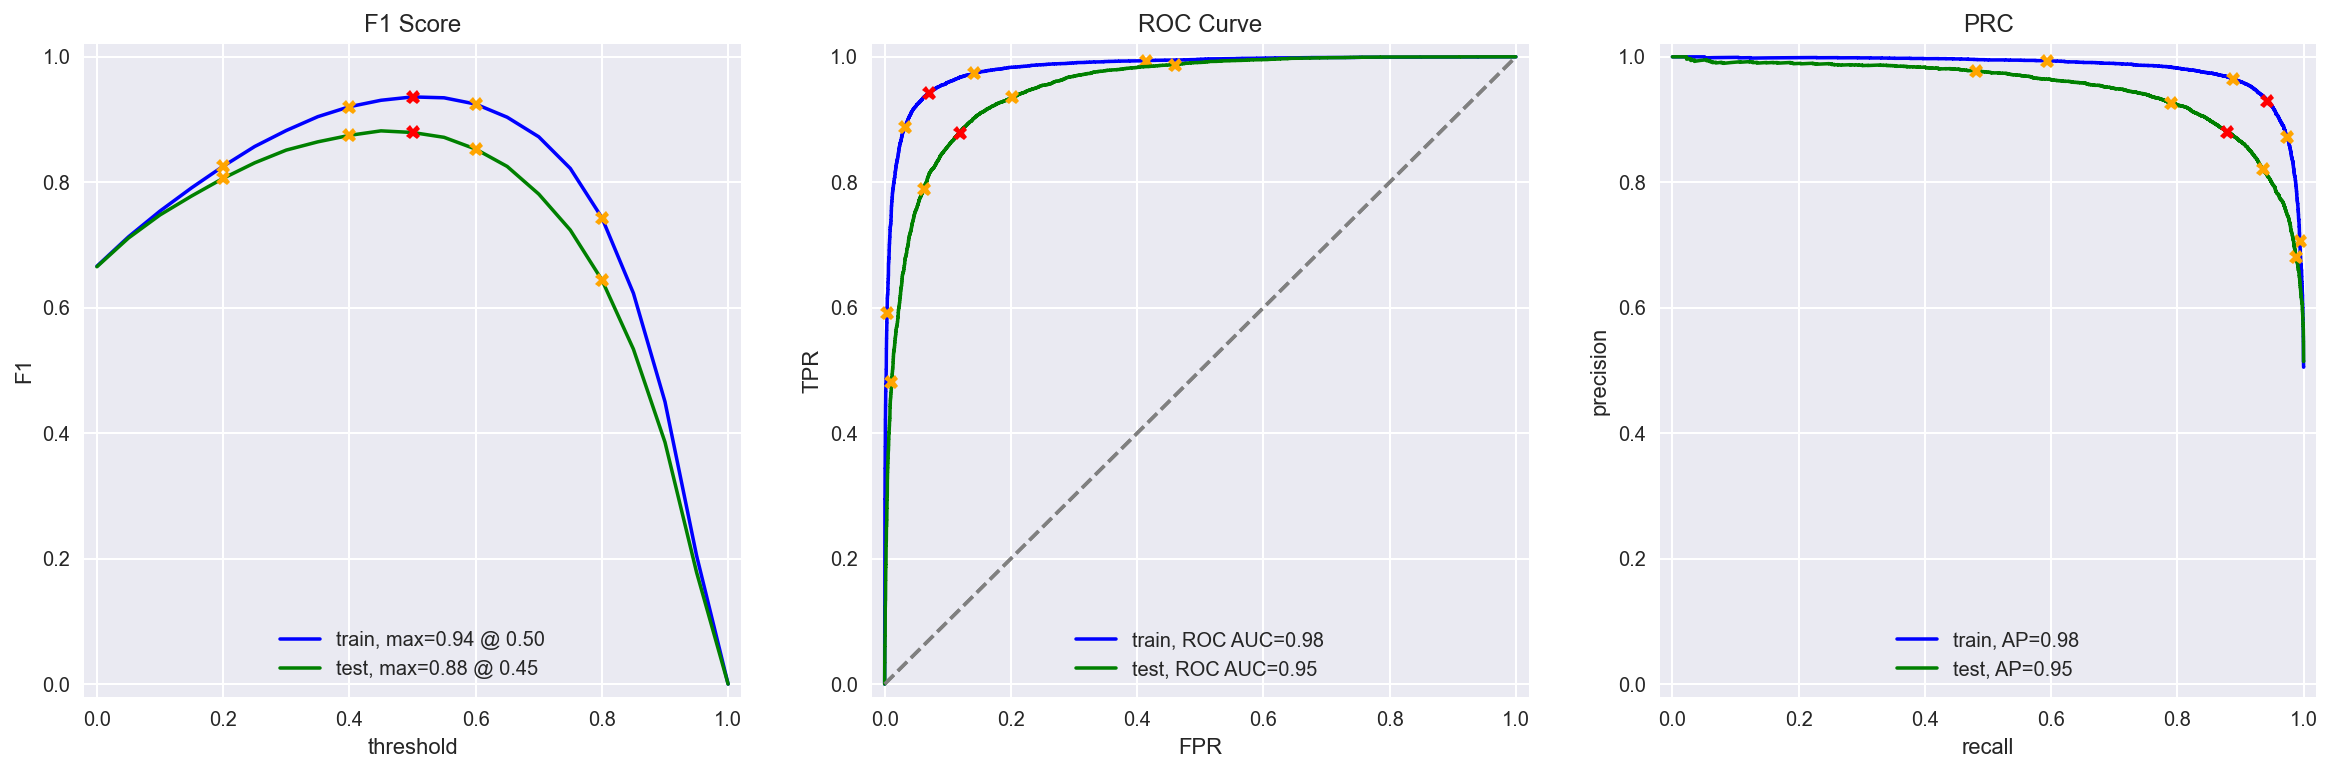

In [45]:
evaluate_model(log_reg_model_ntlk, tf_idf_train_ntlk, train_target, tf_idf_test_ntlk, test_target)

We successfully trained a model using the vectorized text data and the F1 score on the test set, our key metric, is 0.88.

### Model 2 - Linear Regression with spaCy and TF-IDF

We now train another Logistic Regression model, but this time we will tokenise and lemmatise the reviews with the spaCy library.

In [46]:
import spacy

nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

In [47]:
def lemmatize_spacy(text):
    doc = nlp(text)
    tokens = [token.lemma_ for token in doc]
    return ' '.join(tokens)

We run the lemmatize_spacy() function on both the training and test set data:

In [48]:
%%time
df_reviews_train["lemmatized_reviews_spacy"]= df_reviews_train["review_norm"].progress_apply(lemmatize_spacy)

  0%|          | 0/23796 [00:00<?, ?it/s]

Wall time: 28min 28s


In [49]:
%%time
df_reviews_test["lemmatized_reviews_spacy"]= df_reviews_test["review_norm"].progress_apply(lemmatize_spacy)

  0%|          | 0/23535 [00:00<?, ?it/s]

Wall time: 24min 50s


Now we create the TD-IDF vectors for both datasets:

In [50]:
count_tf_idf_sp = TfidfVectorizer(stop_words=stop_words)
tf_idf_train_spacy = count_tf_idf_sp.fit_transform(df_reviews_train['lemmatized_reviews_spacy'])
tf_idf_test_spacy = count_tf_idf_sp.transform(df_reviews_test['lemmatized_reviews_spacy'])

Now we train the Logistic Regression model with these vectors:

In [51]:
log_reg_model_spacy = LogisticRegression(random_state=12345, solver='liblinear')
log_reg_model_spacy.fit(tf_idf_train_spacy, train_target)

LogisticRegression(random_state=12345, solver='liblinear')

Now we evaluate this model using the evaluation routine:

          train  test
Accuracy   0.93  0.88
F1         0.93  0.88
APS        0.98  0.95
ROC AUC    0.98  0.95


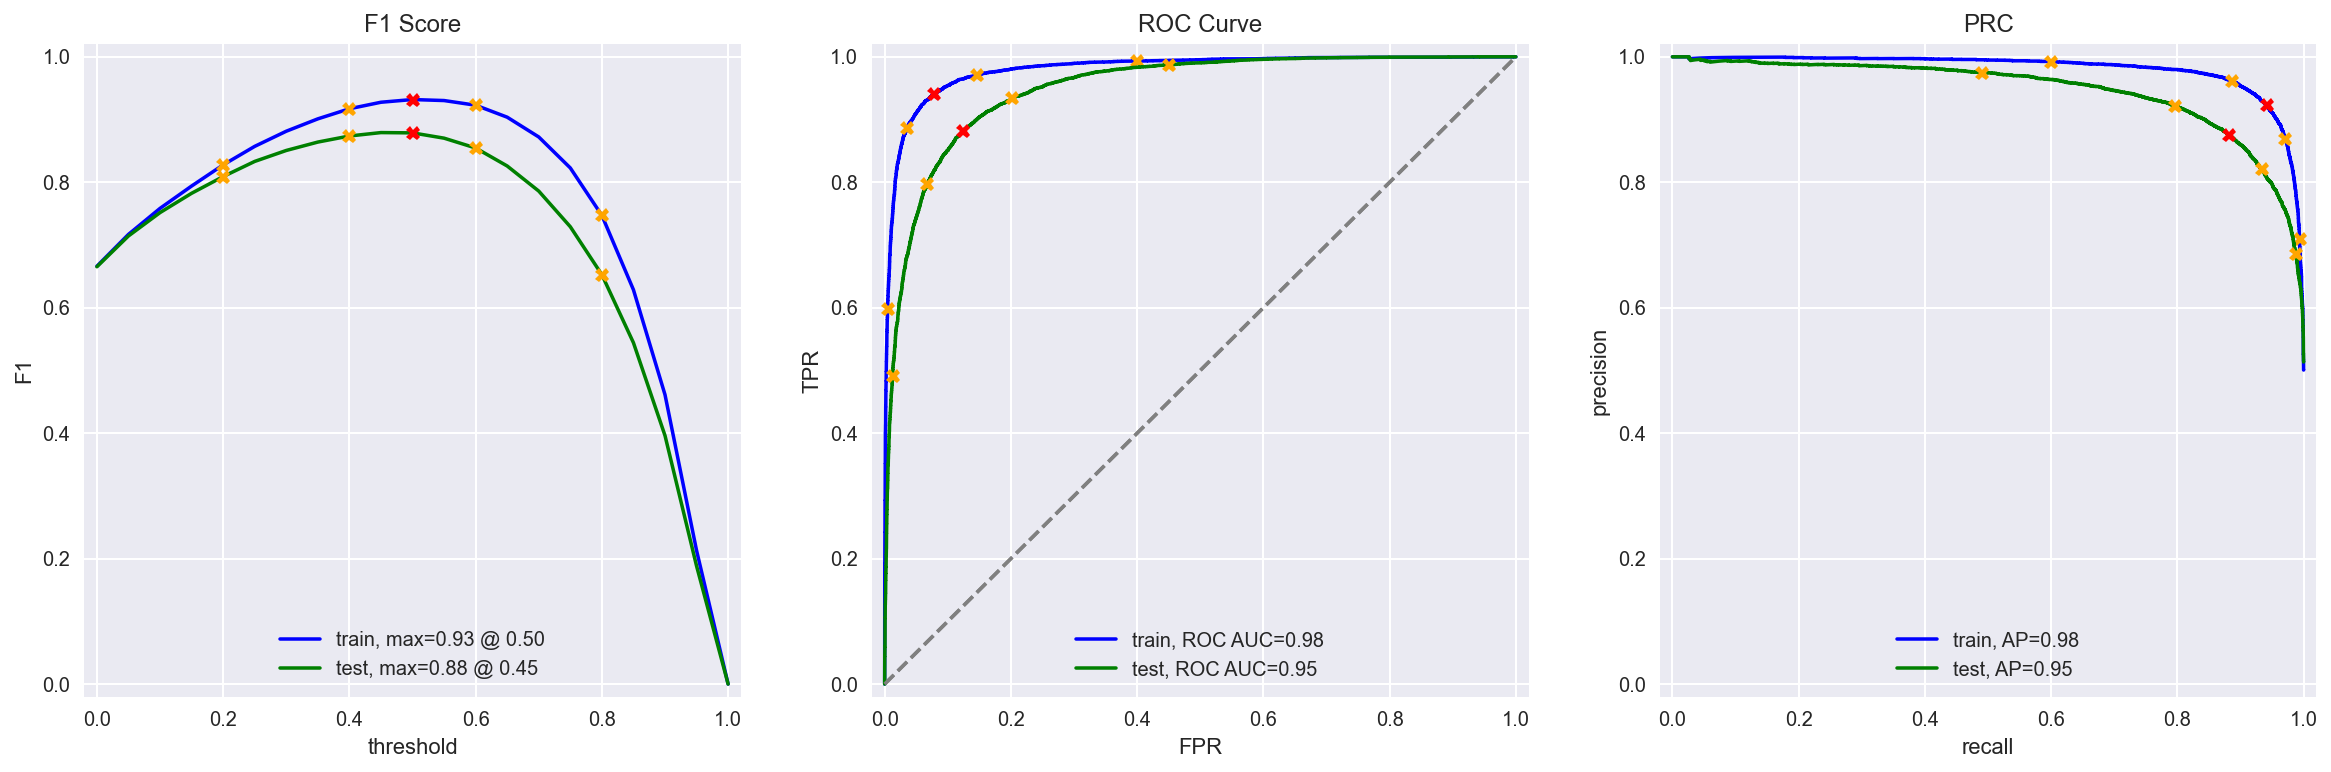

In [52]:
evaluate_model(log_reg_model_spacy, tf_idf_train_spacy, train_target, tf_idf_test_spacy, test_target)

These results are very similar to model 1 and the F1 score is also 0.88.

### Model 3 - LGBMClassifier with SpaCy and TF-IDF

In [53]:
import lightgbm as lgb
from lightgbm import LGBMClassifier

We train the model with the text processed with SpaCy and then evaluate it:

In [54]:
LGBM_model = lgb.LGBMClassifier(num_leaves=500, learning_rate=0.1, n_estimators=100, max_depth=8, seed = 12345)
LGBM_model.fit(tf_idf_train_spacy, train_target)

LGBMClassifier(max_depth=8, num_leaves=500, seed=12345)

          train  test
Accuracy   0.91  0.84
F1         0.92  0.84
APS        0.97  0.92
ROC AUC    0.97  0.92


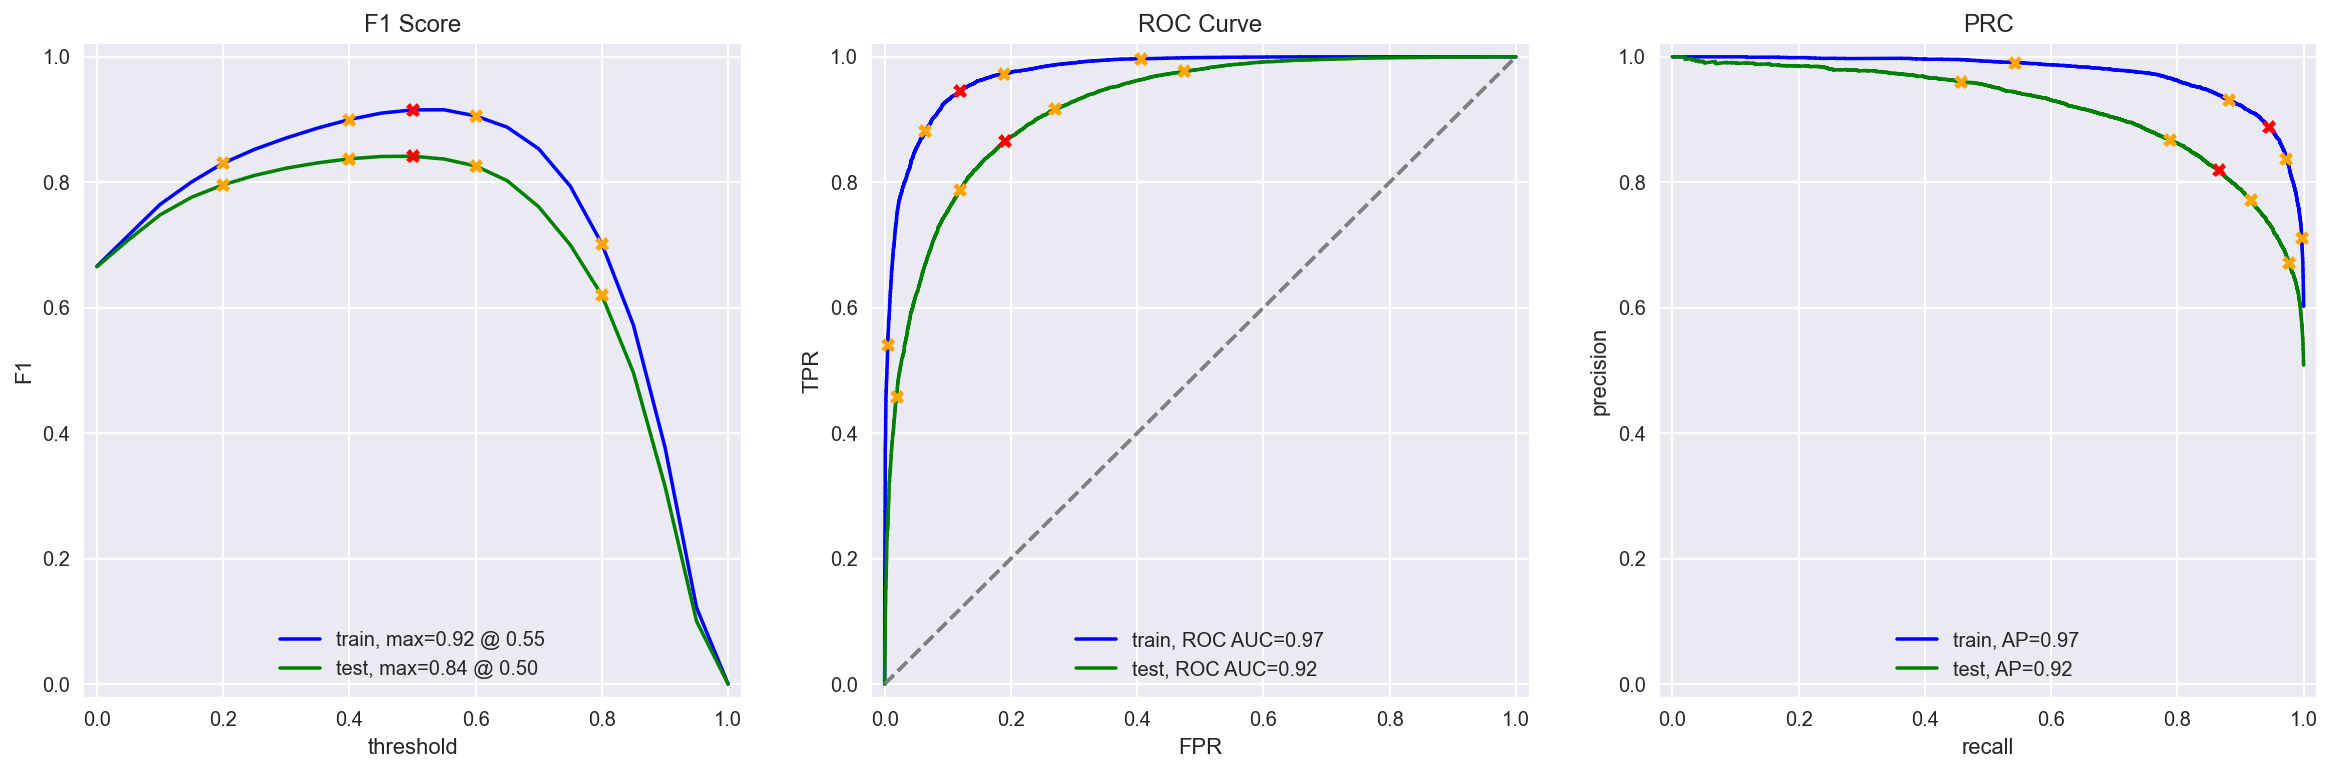

In [55]:
evaluate_model(LGBM_model, tf_idf_train_spacy, train_target, tf_idf_test_spacy, test_target)

The F1 score on the test set is slightly low, at 0.84, just below our threshold. To proceed from here we should tune the hyperparameters.

###  Model 4 - Logistic Regression with BERT (Bidirectional Encoder Representations from Transformers) 

We now use BERT language representation - i.e. by use BERT to create vectors for words. We use the PyTorch and Transformers libraries:

In [59]:
import torch
import transformers

The BERT model is capable of "understanding" the context of a whole text, not just short phrases. When processing words, BERT takes into account both immediate neighbors and more distant words. This allows BERT to produce accurate vectors with respect to the natural meaning of words.

We first initialize an instance of BertTokenizer() with a pre-trained model called 'bert-base-uncased': 

In [60]:
tokenizer = transformers.BertTokenizer.from_pretrained('bert-base-uncased')

We initialize the BertConfig configuration and initialize a model of BertModel class. We pass the file with the pre-trained model and configuration:

In [61]:
config = transformers.BertConfig.from_pretrained('bert-base-uncased')
model = transformers.BertModel.from_pretrained('bert-base-uncased')

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


We write a function that takes a corpus of texts, pre-processes them and returns 'embeddings' for them. Embeddings are vectors that represent specific context in their vector space:

In [62]:
def BERT_text_to_embeddings(texts, max_length=512, batch_size=100, force_device=None, disable_progress_bar=False):
   
    ids_list = []
    attention_mask_list = []

    # text to padded ids of tokens along with their attention masks. 
    # To operate the model correctly, we set the add_special_tokens argument to True to add the beginning token (101) 
    # and the end token (102) to any text that's being transformed.
    # BERT accepts vectors of a fixed length, e.g. of 512 tokens. If there are not enough words in an input string to 
    # fill in the whole vector with tokens (or, rather, their identifiers), the end of the vector is padded with zeros.
    # Attention Mask changes all non zero values to 1
    
    for input_text in tqdm(texts, disable=disable_progress_bar):
        ids = tokenizer.encode(input_text.lower(), add_special_tokens=True, truncation=True, max_length=max_length)
        padded = np.array(ids + [0]*(max_length - len(ids)))
        attention_mask = np.where(padded != 0, 1, 0)
        ids_list.append(padded)
        attention_mask_list.append(attention_mask)
    
    if force_device is not None:
        device = torch.device(force_device)
    else:
        device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
        
    model.to(device)
    if not disable_progress_bar:
        print(f'Using the {device} device.')
    
    # gettings embeddings in batches

    embeddings = []

    for i in tqdm(range(math.ceil(len(ids_list)/batch_size)), disable=disable_progress_bar):
    # We transform the data into a tensor format. LongTensor data type stores numbers in the "long format," that is, it allocates 64 bits for each number.
    # The BERT model creates embeddings in batches:
        ids_batch = torch.LongTensor(ids_list[batch_size*i:batch_size*(i+1)]).to(device)
        attention_mask_batch = torch.LongTensor(attention_mask_list[batch_size*i:batch_size*(i+1)]).to(device)
   
 # We use the no_grad() (no gradient) function to indicate that we don't need gradients in the torch library. This will make calculations faster:
        
        with torch.no_grad():            
            model.eval()
            batch_embeddings = model(input_ids=ids_batch, attention_mask=attention_mask_batch)   
        embeddings.append(batch_embeddings[0][:,0,:].detach().cpu().numpy()) # Extracting the required elements from the tensor and add the list of all the embeddings
    return np.concatenate(embeddings) # Concatenating all the embeddings in a matrix of features

Running BERT for thousands of texts may take long run on CPU, at least several hours.  We will use only 200 reviews from both the train and test datasets to avoid waiting too long.

In [63]:
train_reviews_subset = df_reviews_train['review_norm'][:200].reset_index(drop = True)
test_reviews_subset = df_reviews_test['review_norm'][:200].reset_index(drop = True)
train_target_subset = train_target[:200].reset_index(drop = True)
test_target_subset = test_target[:200].reset_index(drop = True)
print(train_reviews_subset.shape)
print(test_reviews_subset.shape)

(200,)
(200,)


In [64]:
# Attention! 
train_features_bert = BERT_text_to_embeddings(train_reviews_subset)

  0%|          | 0/200 [00:00<?, ?it/s]

Using the cpu device.


  0%|          | 0/2 [00:00<?, ?it/s]

In [65]:
test_features_bert = BERT_text_to_embeddings(test_reviews_subset)

  0%|          | 0/200 [00:00<?, ?it/s]

Using the cpu device.


  0%|          | 0/2 [00:00<?, ?it/s]

In [66]:
print(df_reviews_train['review_norm'].shape)
print(train_features_bert.shape)
print(train_target.shape)
print(train_target_subset.shape)

(23796,)
(200, 768)
(23796,)
(200,)


Now we train a Logistic Regression Model with the BERT embeddings and evaluate it:

In [67]:
log_reg_model_bert = LogisticRegression(random_state=12345, solver='liblinear')
log_reg_model_bert.fit(train_features_bert, train_target_subset)

LogisticRegression(random_state=12345, solver='liblinear')

          train  test
Accuracy    1.0  0.79
F1          1.0  0.76
APS         1.0  0.93
ROC AUC     1.0  0.90


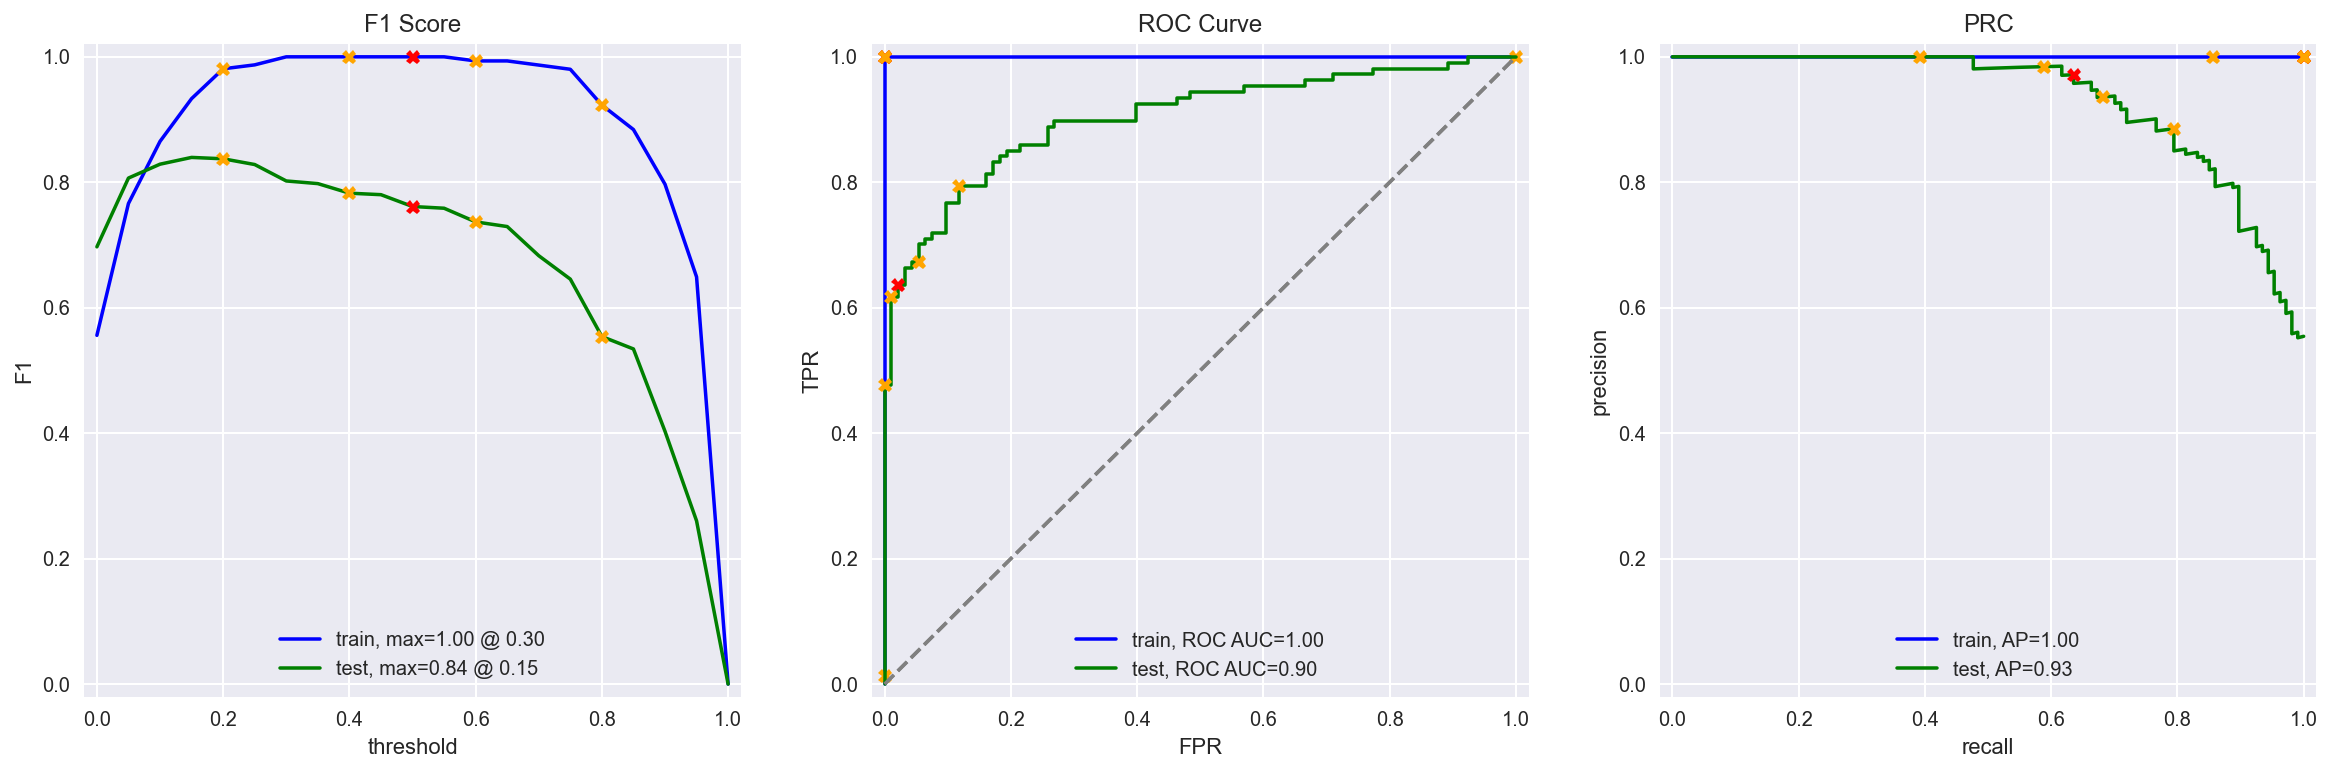

In [68]:
evaluate_model(log_reg_model_bert, train_features_bert, train_target_subset, test_features_bert, test_target_subset)

The results are poor (F1 = 0.76), but this is because we trained the model with only 200 reviews to avoid waiting an excessive amount of time for the model to run on a CPU.

## My Reviews

We will now take some new reviews and use our models to predict if they are negative ('0') or positive ('1'):

### Model 1 - Linear Regression with NLTK and TF-IDF

In [72]:
my_reviews = pd.DataFrame([
    'I did not simply like it, not my kind of movie.',
    'Well, I was bored and felt asleep in the middle of the movie.',
    'I was really fascinated with the movie',    
    'Even the actors looked really old and disinterested, and they got paid to be in the movie. What a soulless cash grab.',
    'I didn\'t expect the reboot to be so good! Writers really cared about the source material',
    'The movie had its upsides and downsides, but I feel like overall it\'s a decent flick. I could see myself going to see it again.',
    'What a rotten attempt at a comedy. Not a single joke lands, everyone acts annoying and loud, even kids won\'t like this!',
    'Launching on Netflix was a brave move & I really appreciate being able to binge on episode after episode, of this exciting intelligent new drama.',
    'I thought this movie was fantastic, I can\'t wait to see it again',
    'I did not like it, not my kind of movie.'
], columns=['review'])

my_reviews['review_norm'] = my_reviews['review'].apply(clear_text)
my_reviews["lemmatized_ntlk"]= my_reviews["review_norm"].apply(lemmatize_ntlk)
my_reviews

,review,review_norm,lemmatized_ntlk
0,"I did not simply like it, not my kind of movie.",i did not simply like it not my kind of movie,i did not simply like it not my kind of movie
1,"Well, I was bored and felt asleep in the middl...",well i was bored and felt asleep in the middle...,well i wa bored and felt asleep in the middle ...
2,I was really fascinated with the movie,i was really fascinated with the movie,i wa really fascinated with the movie
3,Even the actors looked really old and disinter...,even the actors looked really old and disinter...,even the actor looked really old and disintere...
4,I didn't expect the reboot to be so good! Writ...,i didn't expect the reboot to be so good write...,i did n't expect the reboot to be so good writ...
5,"The movie had its upsides and downsides, but I...",the movie had its upsides and downsides but i ...,the movie had it upside and downside but i fee...
6,What a rotten attempt at a comedy. Not a singl...,what a rotten attempt at a comedy not a single...,what a rotten attempt at a comedy not a single...
7,Launching on Netflix was a brave move & I real...,launching on netflix was a brave move i really...,launching on netflix wa a brave move i really ...
8,"I thought this movie was fantastic, I can't wa...",i thought this movie was fantastic i can't wai...,i thought this movie wa fantastic i ca n't wai...
9,"I did not like it, not my kind of movie.",i did not like it not my kind of movie,i did not like it not my kind of movie


In [73]:
texts_ntlk = my_reviews['lemmatized_ntlk']
texts_ntlk.shape

(10,)

Now we find the predicted probability that the review is positive:

In [74]:
my_reviews_pred_prob = log_reg_model_ntlk.predict_proba(count_tf_idf_lr.transform(texts_ntlk))[:, 1]

In [75]:
for i, review in enumerate(texts_ntlk.str.slice(0, 100)):
    print(f'{my_reviews_pred_prob[i]:.2f}:  {review}')

0.16:  i did not simply like it not my kind of movie
0.14:  well i wa bored and felt asleep in the middle of the movie
0.46:  i wa really fascinated with the movie
0.12:  even the actor looked really old and disinterested and they got paid to be in the movie what a soull
0.30:  i did n't expect the reboot to be so good writer really cared about the source material
0.53:  the movie had it upside and downside but i feel like overall it 's a decent flick i could see myself
0.04:  what a rotten attempt at a comedy not a single joke land everyone act annoying and loud even kid wo 
0.87:  launching on netflix wa a brave move i really appreciate being able to binge on episode after episod
0.87:  i thought this movie wa fantastic i ca n't wait to see it again
0.28:  i did not like it not my kind of movie


The code outputs the probability of the review being positive.  The model does a pretty good job of assessing the reviews.

### Model 2 - Linear Regression with spaCy and TF-IDF

We run the same tests with the text lemmatised with SpaCy:

In [76]:
my_reviews["lemmatized_spacy"]= my_reviews["review_norm"].apply(lemmatize_spacy)

In [77]:
my_reviews

,review,review_norm,lemmatized_ntlk,lemmatized_spacy
0,"I did not simply like it, not my kind of movie.",i did not simply like it not my kind of movie,i did not simply like it not my kind of movie,I do not simply like it not my kind of movie
1,"Well, I was bored and felt asleep in the middl...",well i was bored and felt asleep in the middle...,well i wa bored and felt asleep in the middle ...,well I be bored and feel asleep in the middle ...
2,I was really fascinated with the movie,i was really fascinated with the movie,i wa really fascinated with the movie,I be really fascinated with the movie
3,Even the actors looked really old and disinter...,even the actors looked really old and disinter...,even the actor looked really old and disintere...,even the actor look really old and disinterest...
4,I didn't expect the reboot to be so good! Writ...,i didn't expect the reboot to be so good write...,i did n't expect the reboot to be so good writ...,I do not expect the reboot to be so good write...
5,"The movie had its upsides and downsides, but I...",the movie had its upsides and downsides but i ...,the movie had it upside and downside but i fee...,the movie have its upside and downside but I f...
6,What a rotten attempt at a comedy. Not a singl...,what a rotten attempt at a comedy not a single...,what a rotten attempt at a comedy not a single...,what a rotten attempt at a comedy not a single...
7,Launching on Netflix was a brave move & I real...,launching on netflix was a brave move i really...,launching on netflix wa a brave move i really ...,launch on netflix be a brave move I really app...
8,"I thought this movie was fantastic, I can't wa...",i thought this movie was fantastic i can't wai...,i thought this movie wa fantastic i ca n't wai...,I think this movie be fantastic I can not wait...
9,"I did not like it, not my kind of movie.",i did not like it not my kind of movie,i did not like it not my kind of movie,I do not like it not my kind of movie


In [78]:
texts_spacy = my_reviews['lemmatized_spacy']

my_reviews_pred_prob = log_reg_model_spacy.predict_proba(count_tf_idf_sp.transform(texts_spacy))[:, 1]

for i, review in enumerate(texts_spacy.str.slice(0, 100)):
    print(f'{my_reviews_pred_prob[i]:.2f}:  {review}')

0.20:  I do not simply like it not my kind of movie
0.12:  well I be bored and feel asleep in the middle of the movie
0.49:  I be really fascinated with the movie
0.10:  even the actor look really old and disintereste and they get pay to be in the movie what a soulless 
0.27:  I do not expect the reboot to be so good writer really care about the source material
0.50:  the movie have its upside and downside but I feel like overall it be a decent flick I could see myse
0.03:  what a rotten attempt at a comedy not a single joke land everyone act annoying and loud even kid wil
0.92:  launch on netflix be a brave move I really appreciate be able to binge on episode after episode of t
0.95:  I think this movie be fantastic I can not wait to see it again
0.34:  I do not like it not my kind of movie


By obervation, it appears the probabilities here are more accurate than in model 1.

### Model 3 - LGBMClassifier with SpaCy and TF-IDF

In [79]:
texts = my_reviews['lemmatized_spacy']

my_reviews_pred_prob = LGBM_model.predict_proba(count_tf_idf_sp.transform(texts))[:, 1]

for i, review in enumerate(texts.str.slice(0, 100)):
    print(f'{my_reviews_pred_prob[i]:.2f}:  {review}')

0.63:  I do not simply like it not my kind of movie
0.53:  well I be bored and feel asleep in the middle of the movie
0.63:  I be really fascinated with the movie
0.56:  even the actor look really old and disintereste and they get pay to be in the movie what a soulless 
0.72:  I do not expect the reboot to be so good writer really care about the source material
0.68:  the movie have its upside and downside but I feel like overall it be a decent flick I could see myse
0.42:  what a rotten attempt at a comedy not a single joke land everyone act annoying and loud even kid wil
0.71:  launch on netflix be a brave move I really appreciate be able to binge on episode after episode of t
0.78:  I think this movie be fantastic I can not wait to see it again
0.63:  I do not like it not my kind of movie


There are no low probablilities here; so all are predicted to be relatively positive which is clearly not the case. This model does not do very well.

### Model 4 - Logistic Regression with BERT

In [80]:
%%time

texts = my_reviews['review_norm']

my_reviews_bert = BERT_text_to_embeddings(texts, disable_progress_bar=True)

my_reviews_pred_prob = log_reg_model_bert.predict_proba(my_reviews_bert)[:, 1]

for i, review in enumerate(texts.str.slice(0, 100)):
    print(f'{my_reviews_pred_prob[i]:.2f}:  {review}')

0.03:  i did not simply like it not my kind of movie
0.00:  well i was bored and felt asleep in the middle of the movie
0.07:  i was really fascinated with the movie
0.00:  even the actors looked really old and disinterested and they got paid to be in the movie what a soul
0.00:  i didn't expect the reboot to be so good writers really cared about the source material
0.15:  the movie had its upsides and downsides but i feel like overall it's a decent flick i could see myse
0.00:  what a rotten attempt at a comedy not a single joke lands everyone acts annoying and loud even kids 
0.54:  launching on netflix was a brave move i really appreciate being able to binge on episode after episo
0.17:  i thought this movie was fantastic i can't wait to see it again
0.01:  i did not like it not my kind of movie
Wall time: 1min 44s


Most of the probabilites here are very reasonable, especially as this Logistic Regression/BERT model was trained on only 200 reviews out of over 47,000.  A few are less accurate, but that is to be expected given the small training set. 

## Conclusions

Both the Logistic Regression models performed equally well according to the F1 scores obtained on the test set data.  On these last few reviews above, the SpaCy model seemed to outperform the NTLK one. However, it took much more time to get the vectors with the text lemmatised with the SpaCy library, than with the NTLK library.

The LGBMClassifier performed less well than expected, though this could be improved potentially with hyper-parameter tuning.

Creating Word Embeddings with BERT is only practical on a GPU. However, based on the small test of these last 10 reviews, most of the predictions seem very reasonable, especially as the Logistic Regression/BERT model was trained on only 200 reviews out of over 47,000. A few are less accurate, but that is to be expected given the small training set. 